# Análise estatítica da performance de alunos de uma escola

## Contexto

O time pedagógico de uma escola gostaria de saber se a implementação de um curso preparatório pode melhorar o desempenho dos alunos nas avaliações. Para coletar dados para análise, o curso preparatório foi disponibilizado gratuitamente para uma amostra de alunos. Com base nos resultados do teste, o negócio irá decidir se o curso deve ou não ser expandido para todos os alunos da escola. Inicialmente, o foco da análise deve ser nas notas de matemática.


Objetivos da análise:

- Verificar se há evidência estatística de que a média das notas de matemática dos alunos que fizeram o curso preparatório é maior do que daqueles que não fizeram.

- Verificar se há evidência estatística de que a proporção de alunos aprovados em matemática (nota ≥ 60) é maior entre os que fizeram o curso preparatório.

- Caso se verifique que a média de notas e a proporção de aprovação são maiores com a aplicação do curso, analisar se o tamanho do efeito é suficientemente relevante para justificar a expansão da oferta do curso preparatório. O negócio considera que o "ganho mínimo" corresponde a um aumento de pelo menos 5 pontos na média de notas e de pelo menos 10 pontos percentuais no percentual de aprovação.

- Estimar o custo-benefício da expansão do curso preparatório para a escola. Os cursos da escola são vendidos por 200 reais cada, exceto o preparatório, que seria vendido por 100 reais; os custos com o curso preparatório são de 50 reais por aluno (material, horas-aula de professor, etc); e alunos aprovados em uma disciplina tem 10% mais probabilidade de se inscreverem em outras matérias.

## Dicionário de dados

|**Coluna**                    | **Descrição**                                                                           |
|------------------------------|-----------------------------------------------------------------------------------------|
|gender                        |Gênero do aluno                                                                          |
|race/ethnicity                |Raça do aluno                                                                            |
|parental level of education   |Escolaridade dos pais do aluno                                                           |
|lunch                         |Tipo de almoço que o aluno recebe na escola                                              |
|test preparation course       |Variável categórica binária que indica se o aluno participou ou não do curso preparatório|
|math score                    |Nota de matemática do aluno                                                              |
|reading score                 |Nota de leitura do aluno                                                                 |
|writing score	               |Nota de escrita do aluno                                                                 |

## Preparação dos dados

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats import proportion

In [3]:
# Import data
df_raw = pd.read_csv('data/students_performance.csv')
df_raw.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Copy data
df = df_raw.copy()

In [5]:
# Rename columns
df.columns = df.columns.str.replace(' ', '_')

## EDA

In [6]:
pd.DataFrame({
    'Tipo de dado': df.dtypes,
    'Quantidade de nulos': df.isnull().sum(),
    'Percentual de nulos': df.isnull().mean()*100,
    'Qtde valores únicos': df.nunique(),
    'Exemplos valores únicos': df.apply(lambda x: x.unique()[:5])
})

,Tipo de dado,Quantidade de nulos,Percentual de nulos,Qtde valores únicos,Exemplos valores únicos
gender,object,0,0.0,2,"[female, male]"
race/ethnicity,object,0,0.0,5,"[group B, group C, group A, group D, group E]"
parental_level_of_education,object,0,0.0,6,"[bachelor's degree, some college, master's deg..."
lunch,object,0,0.0,2,"[standard, free/reduced]"
test_preparation_course,object,0,0.0,2,"[none, completed]"
math_score,int64,0,0.0,81,"[72, 69, 90, 47, 76]"
reading_score,int64,0,0.0,72,"[72, 90, 95, 57, 78]"
writing_score,int64,0,0.0,77,"[74, 88, 93, 44, 75]"


Não há dados nulos.

Os tipos de dados estão adequados.

In [7]:
df.parental_level_of_education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

Os dados das colunas de texto estão consistentes, não apresentando dados "duplicados" por erros de escrita.

### Exploração univariada

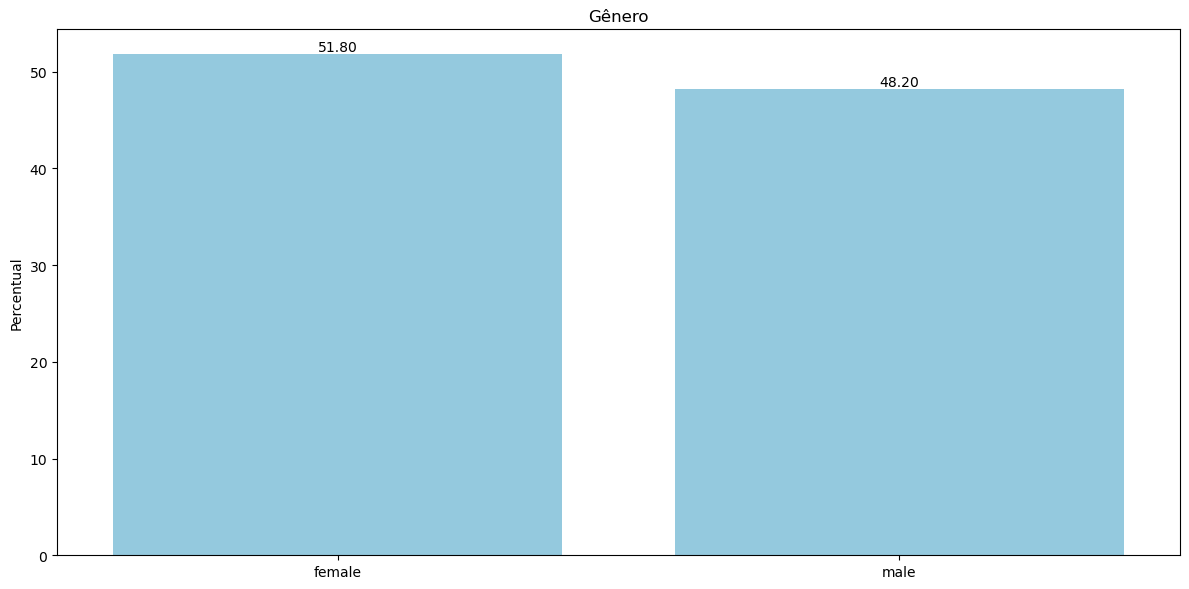

In [8]:
# Distribuição de gênero
plt.subplots(figsize=(12, 6))
ax = sns.countplot(df, x='gender', stat='percent', color='skyblue')
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Gênero')
ax.set_xlabel('')
ax.set_ylabel('Percentual')
plt.tight_layout();

A proporção de mulheres na base é ligeiramente superior a de homens.

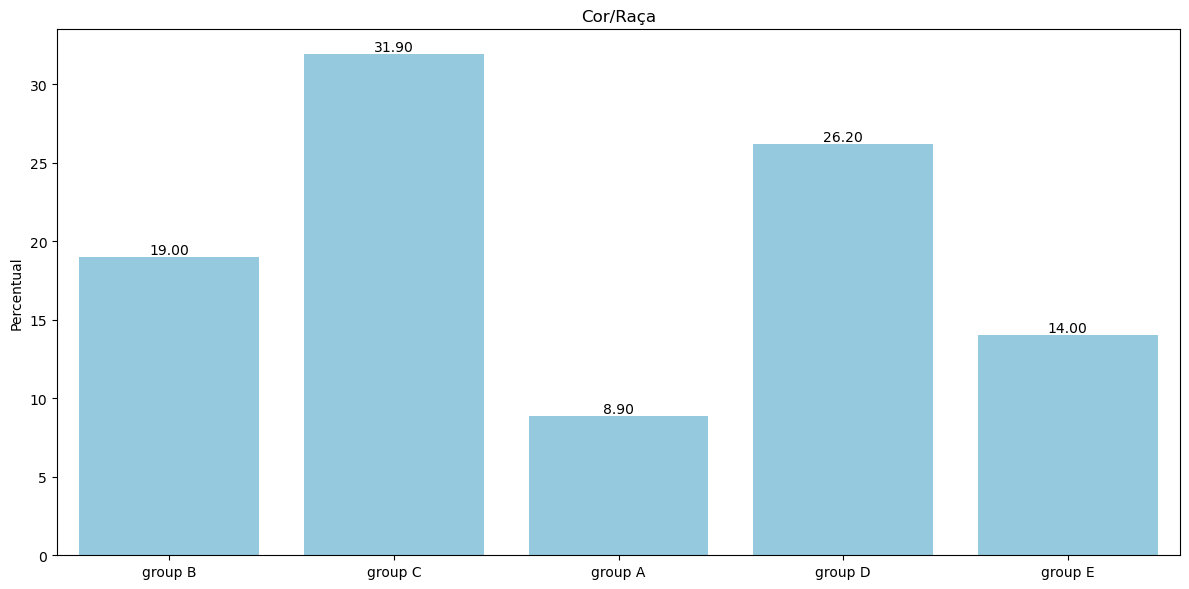

In [9]:
# Distribuição de cor/raça
plt.subplots(figsize=(12, 6))
ax = sns.countplot(df, x='race/ethnicity', stat='percent', color='skyblue')
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Cor/Raça')
ax.set_xlabel('')
ax.set_ylabel('Percentual')
plt.tight_layout();

A distribuição de raças nos dados não é uniforme, havendo mais representantes do grupo C.

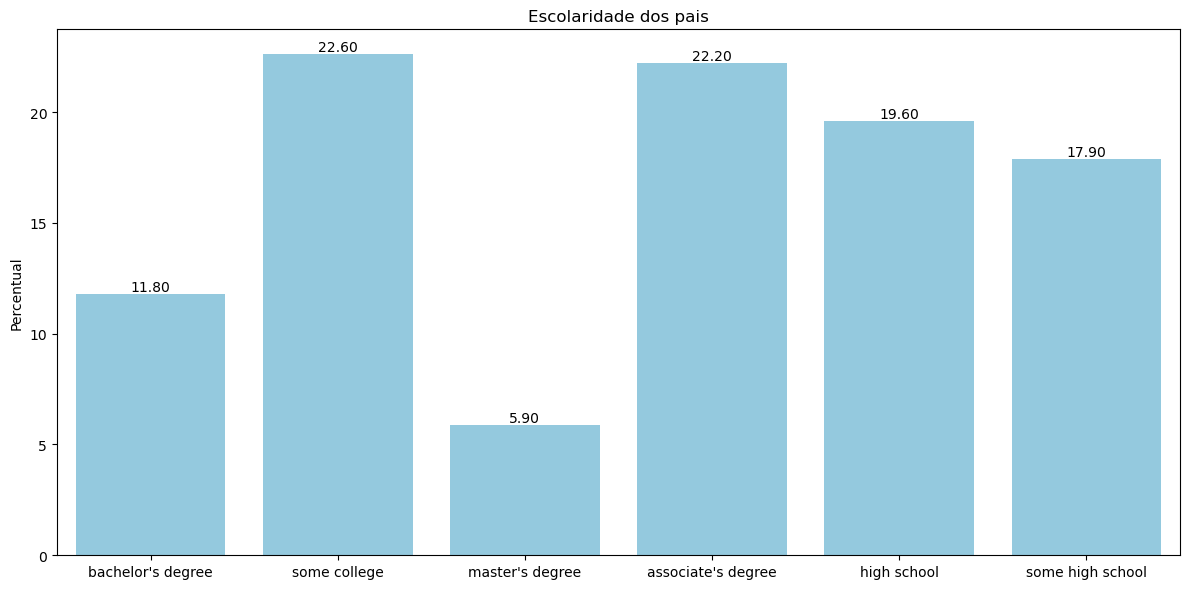

In [10]:
# Distribuição de escolaridade dos pais
plt.subplots(figsize=(12, 6))
ax = sns.countplot(df, x='parental_level_of_education', stat='percent', color='skyblue')
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Escolaridade dos pais')
ax.set_xlabel('')
ax.set_ylabel('Percentual')
plt.tight_layout();

A distribuição de escolaridade dos pais nos dados não é uniforme, havendo mais representantes com 'some college' e 'associate's degree'.

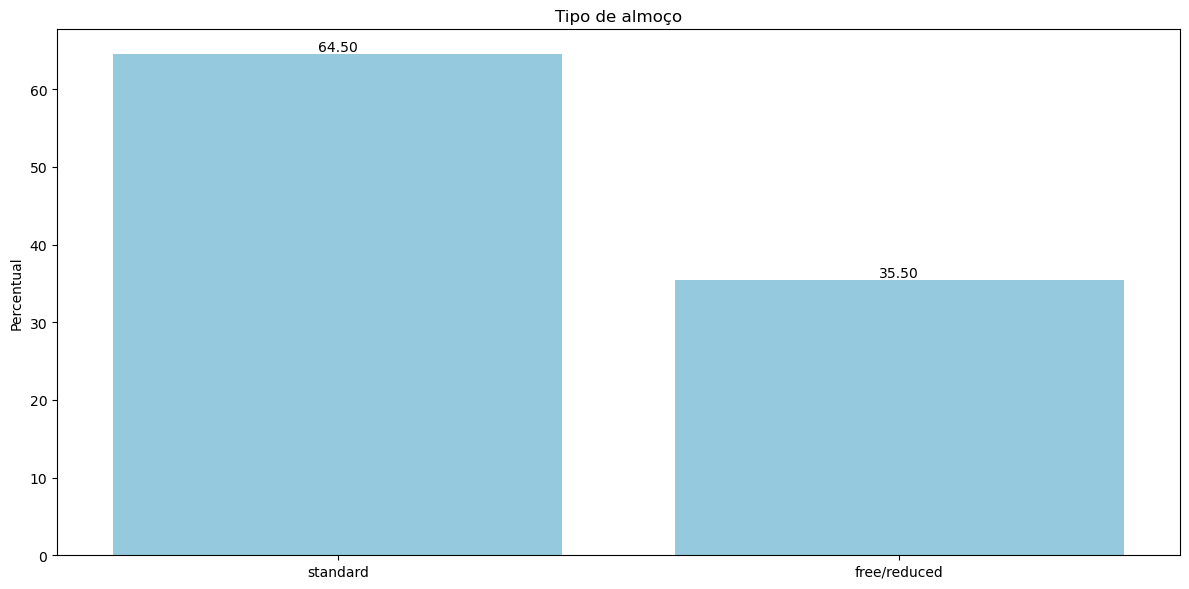

In [11]:
# Distribuição de almoço
plt.subplots(figsize=(12, 6))
ax = sns.countplot(df, x='lunch', stat='percent', color='skyblue')
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Tipo de almoço')
ax.set_xlabel('')
ax.set_ylabel('Percentual')
plt.tight_layout();

A distribuição não é uniforme, há mais alunos com o tipo de almoço 'standard'.

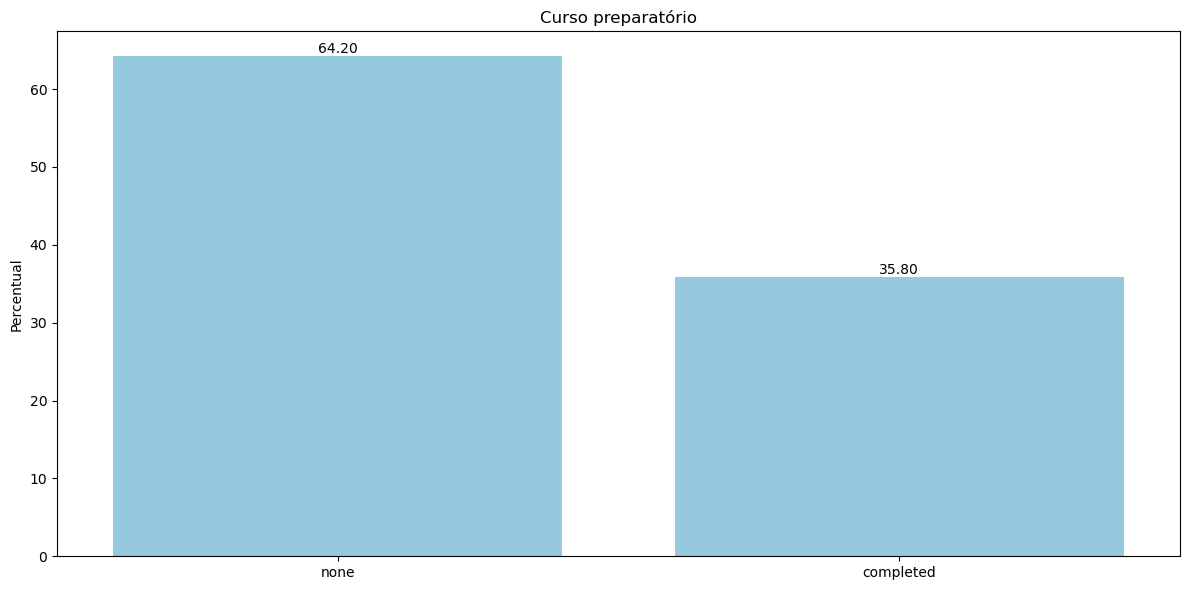

In [59]:
# Distribuição de curso preparatório
plt.subplots(figsize=(12, 6))
ax = sns.countplot(df, x='test_preparation_course', stat='percent', color='skyblue')
ax.bar_label(container=ax.containers[0], fmt='%.2f')
ax.set_title('Curso preparatório')
ax.set_xlabel('')
ax.set_ylabel('Percentual')
plt.tight_layout();

A maioria não realizou o teste preparatório.

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


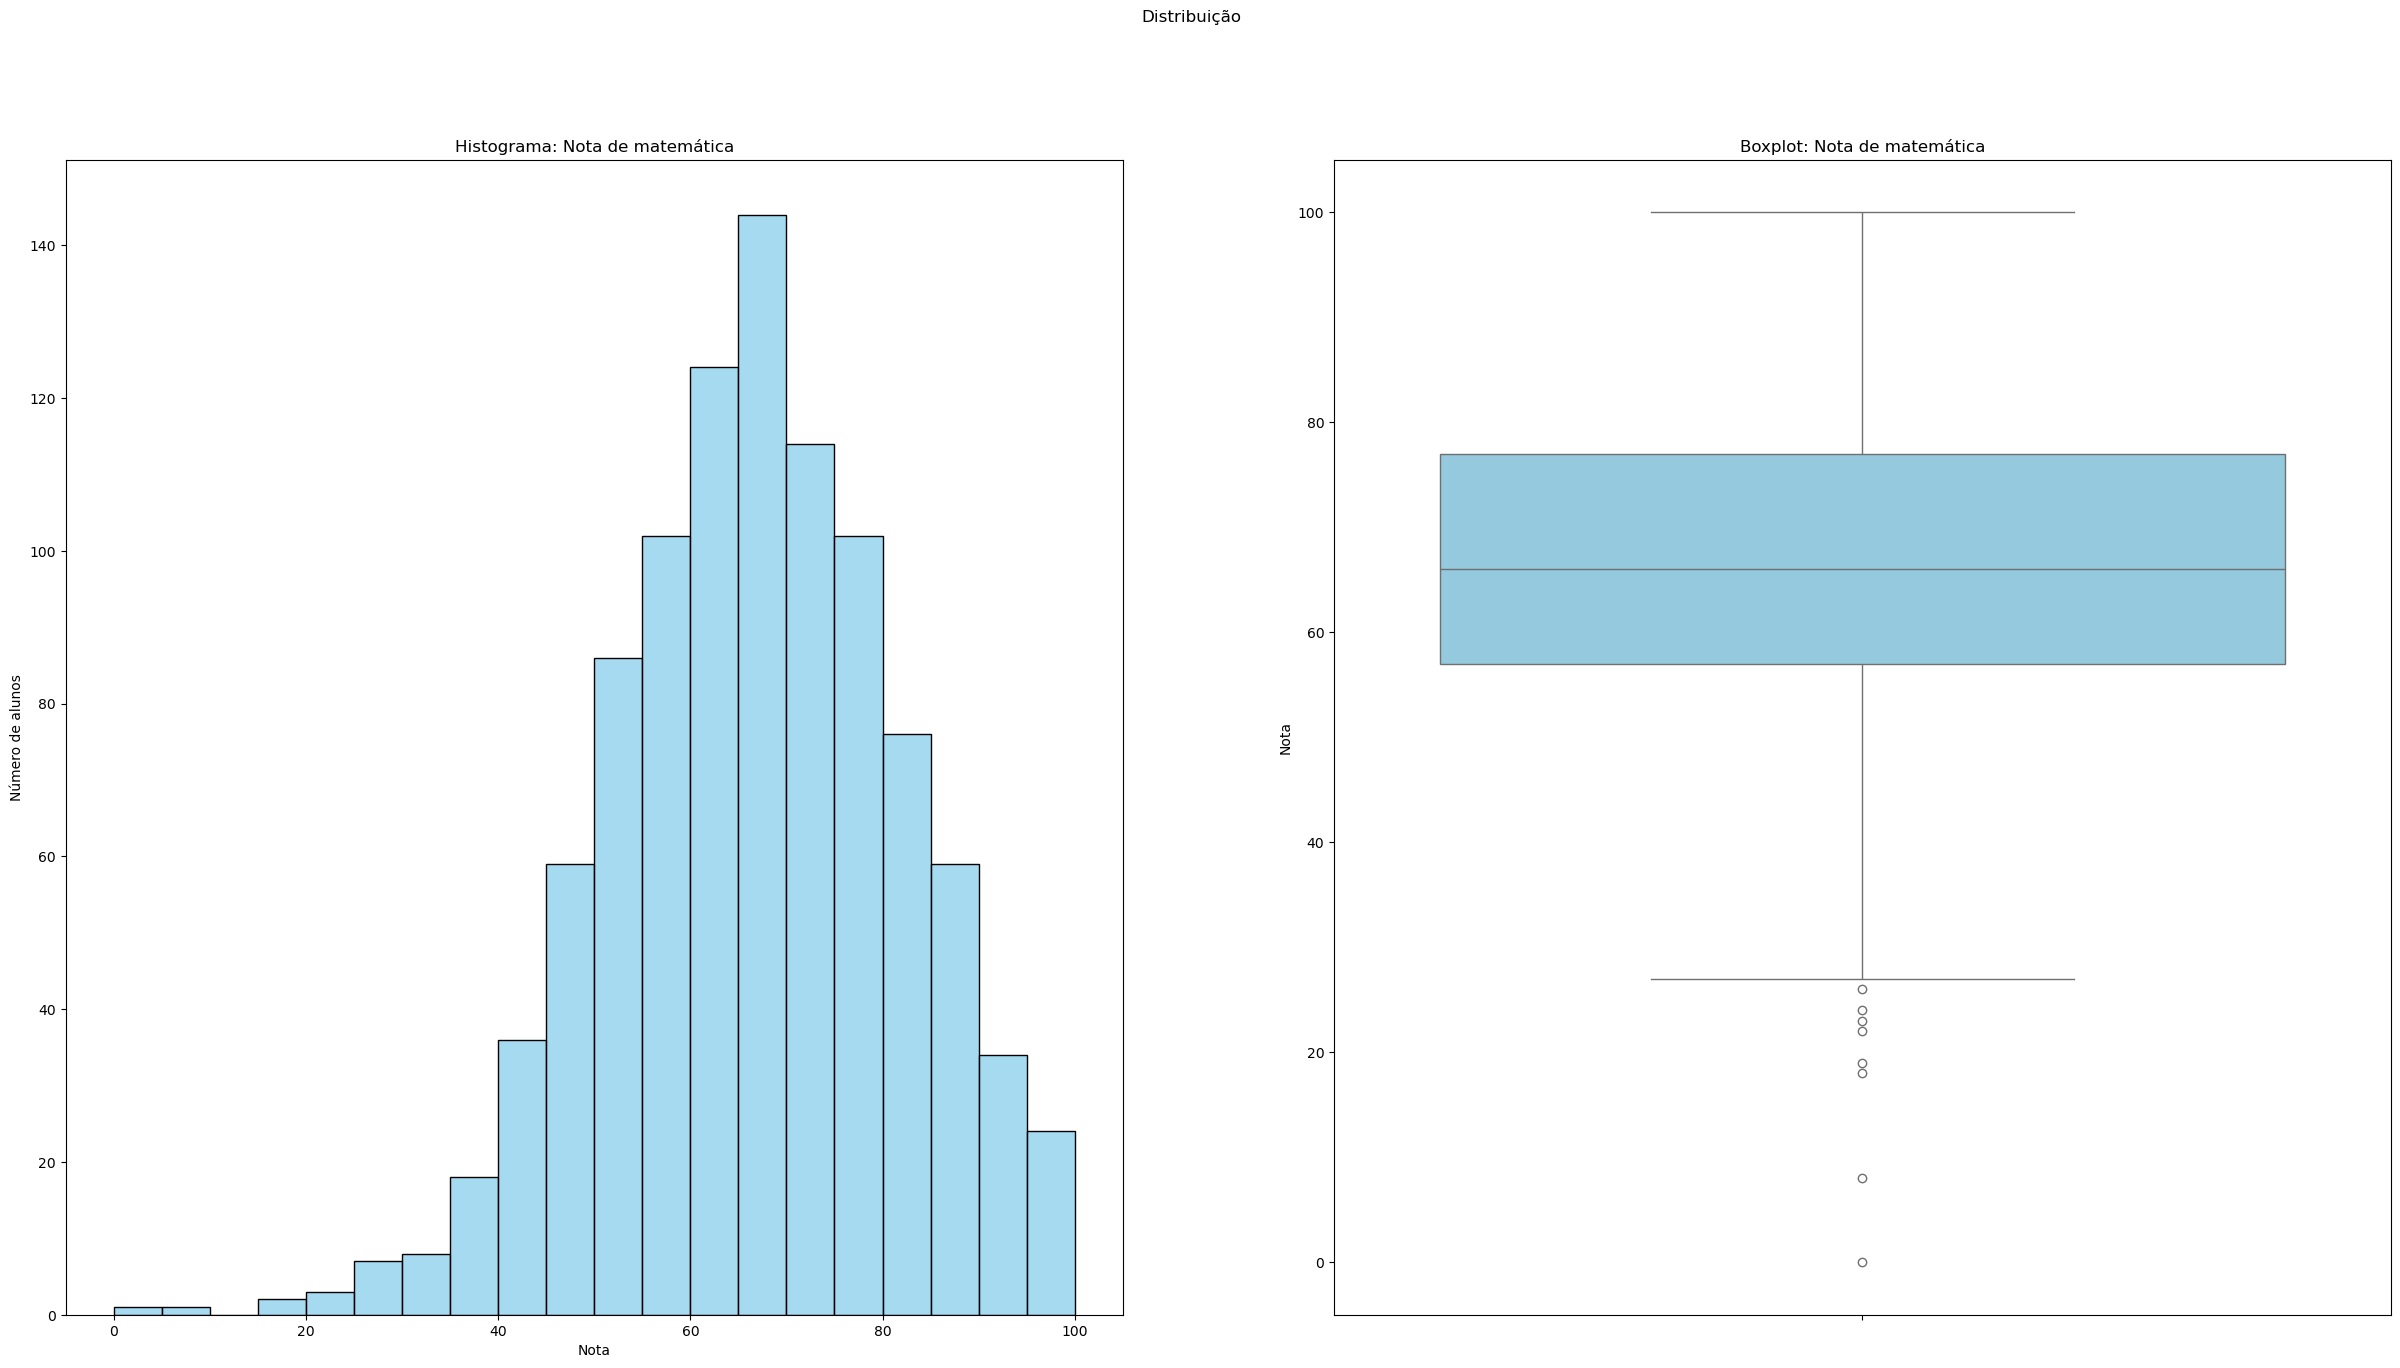

In [14]:
# Nota de matemática

fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Distribuição')

# Histograma
sns.histplot(ax=axes[0], data=df, x='math_score', bins=20, color='skyblue')
axes[0].set_title('Histograma: Nota de matemática')
axes[0].set_xlabel('Nota') 
axes[0].set_ylabel('Número de alunos') 

# Boxlot
sns.boxplot(data=df['math_score'], color='skyblue')
axes[1].set_title('Boxplot: Nota de matemática')
axes[1].set_xlabel('') 
axes[1].set_ylabel('Nota');

In [15]:
print(f'Skew: {df['math_score'].skew():.2f} \nCurtose: {df['math_score'].kurtosis():.2f}')

Skew: -0.28 
Curtose: 0.27


A distribuição das notas de matemática apresenta cauda longa a esquerda (distribuição negativa).

O boxplot indica alguns outliers nas notas abaixo do limite inferior.

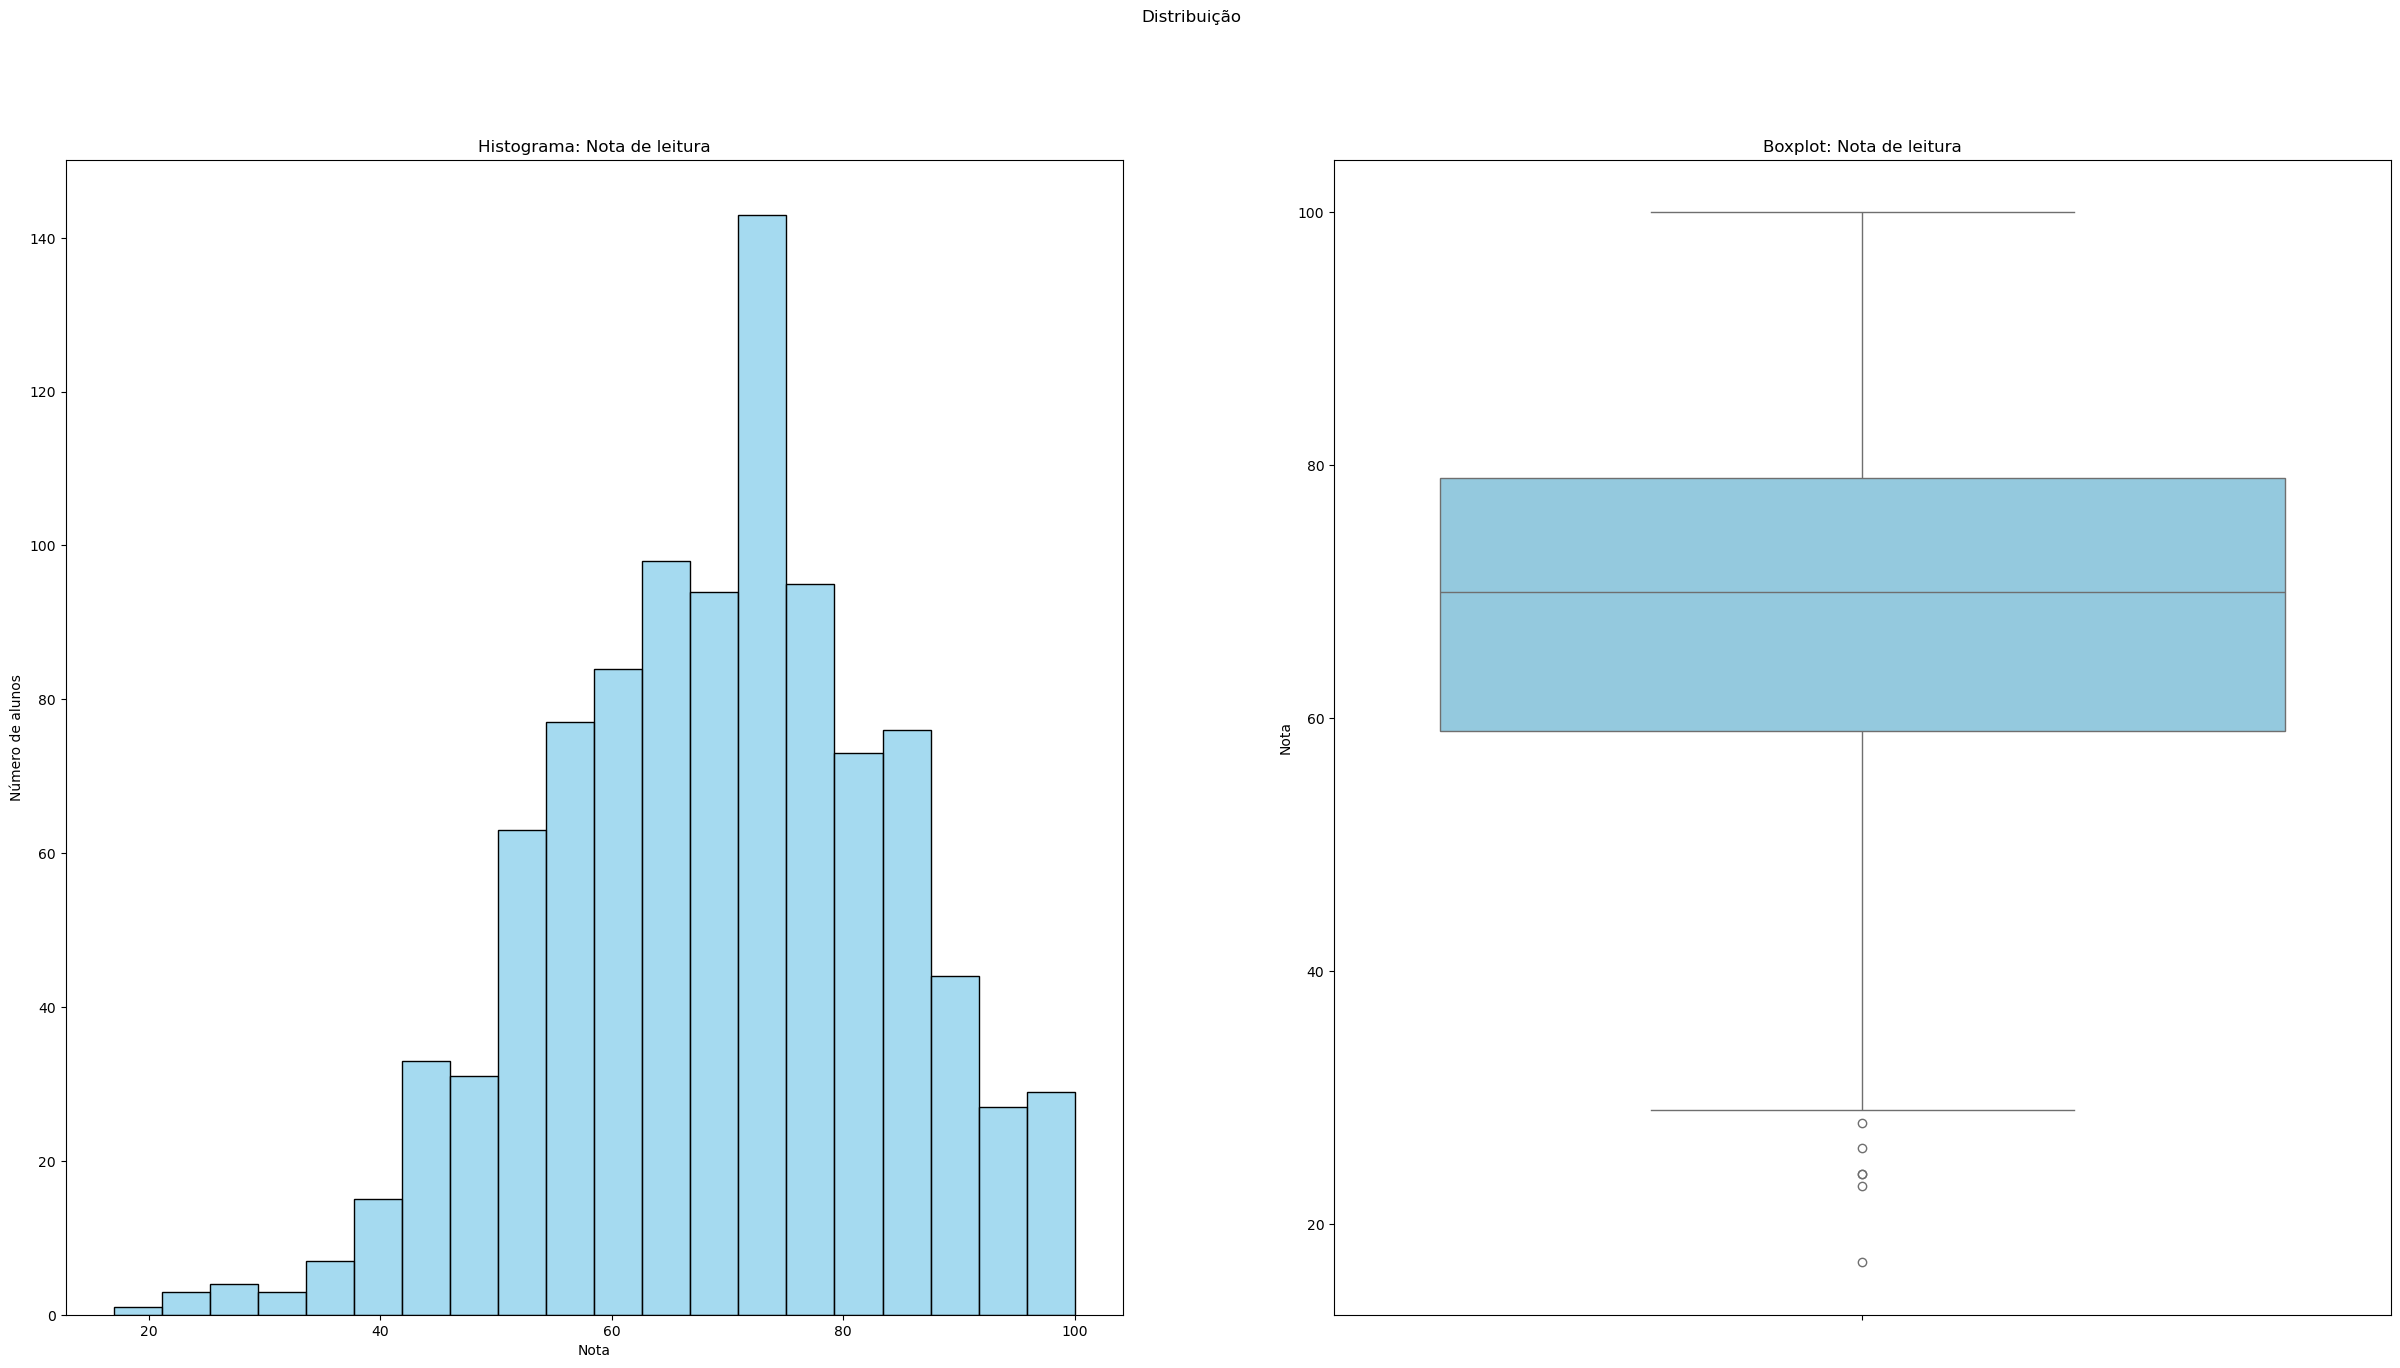

In [16]:
# Nota de leitura

fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Distribuição')

# Histograma
sns.histplot(ax=axes[0], data=df, x='reading_score', bins=20, color='skyblue')
axes[0].set_title('Histograma: Nota de leitura')
axes[0].set_xlabel('Nota') 
axes[0].set_ylabel('Número de alunos') 

# Boxlot
sns.boxplot(data=df['reading_score'], color='skyblue')
axes[1].set_title('Boxplot: Nota de leitura')
axes[1].set_xlabel('') 
axes[1].set_ylabel('Nota');

In [17]:
print(f'Skew: {df['reading_score'].skew():.2f} \nCurtose: {df['reading_score'].kurtosis():.2f}')

Skew: -0.26 
Curtose: -0.07


A distribuição das notas de leitura apresenta cauda longa a esquerda (distribuição negativa).

O boxplot indica alguns outliers nas notas abaixo do limite inferior.

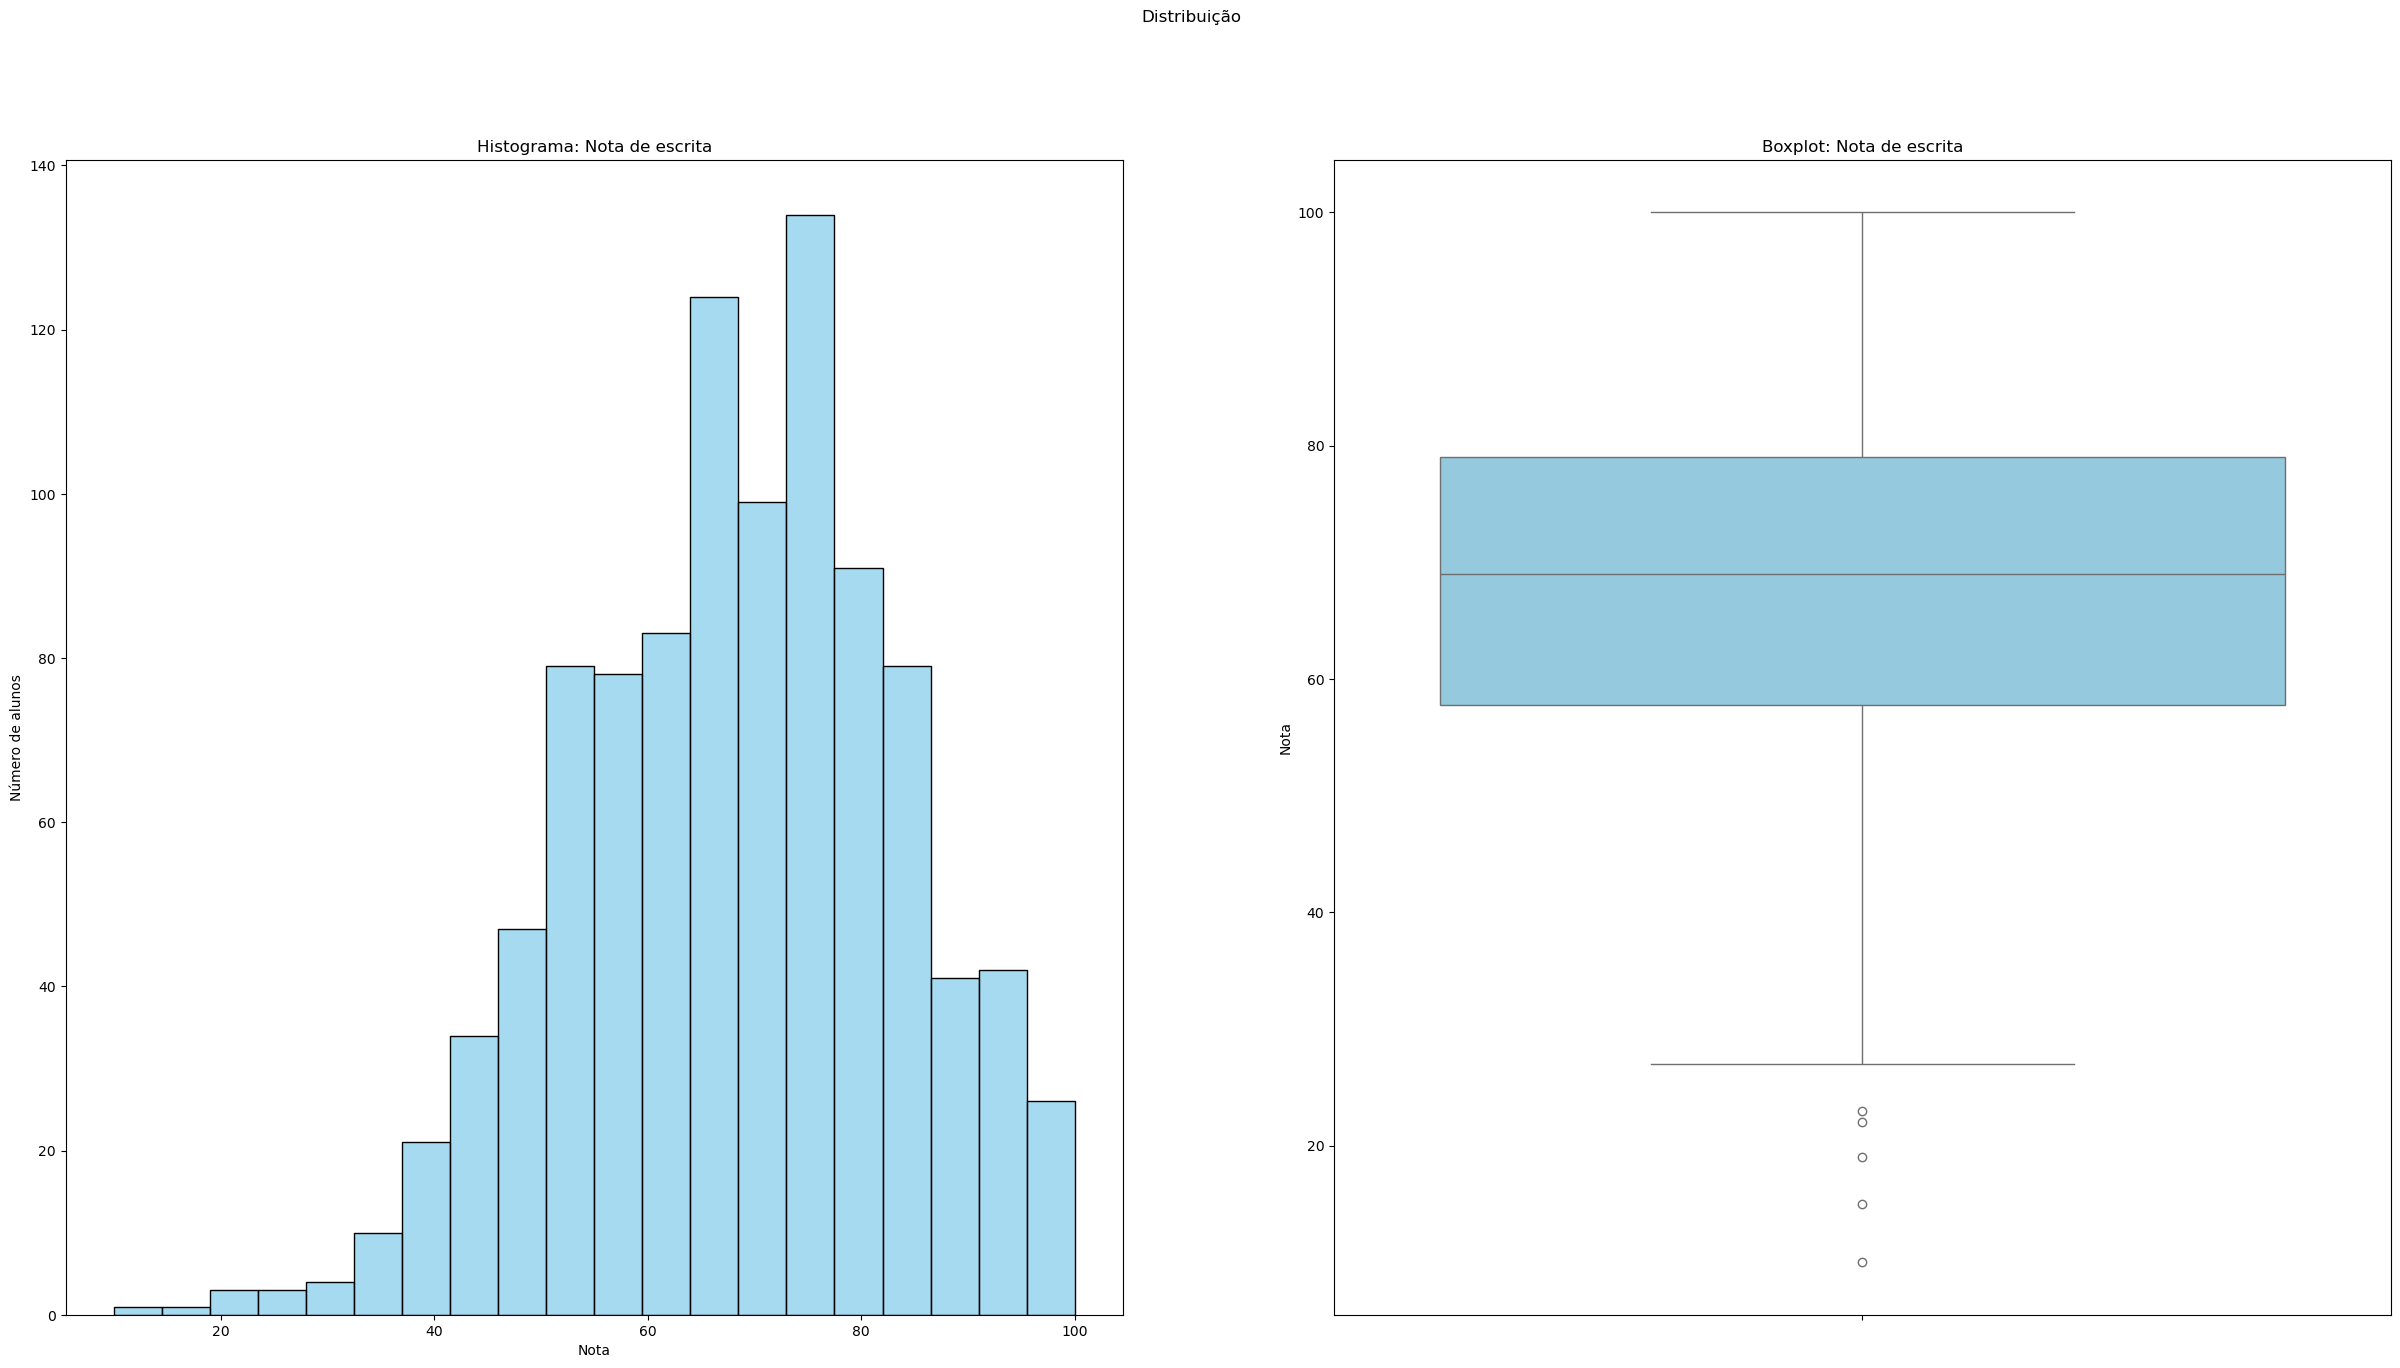

In [18]:
# Nota de escrita

fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Distribuição')

# Histograma
sns.histplot(ax=axes[0], data=df, x='writing_score', bins=20, color='skyblue')
axes[0].set_title('Histograma: Nota de escrita')
axes[0].set_xlabel('Nota') 
axes[0].set_ylabel('Número de alunos') 

# Boxlot
sns.boxplot(data=df['writing_score'], color='skyblue')
axes[1].set_title('Boxplot: Nota de escrita')
axes[1].set_xlabel('') 
axes[1].set_ylabel('Nota');

In [19]:
print(f'Skew: {df['writing_score'].skew():.2f} \nCurtose: {df['writing_score'].kurtosis():.2f}')

Skew: -0.29 
Curtose: -0.03


A distribuição das notas de escrita apresenta cauda longa a esquerda (distribuição negativa).

O boxplot indica alguns outliers nas notas abaixo do limite inferior.

### Exploração multivariada

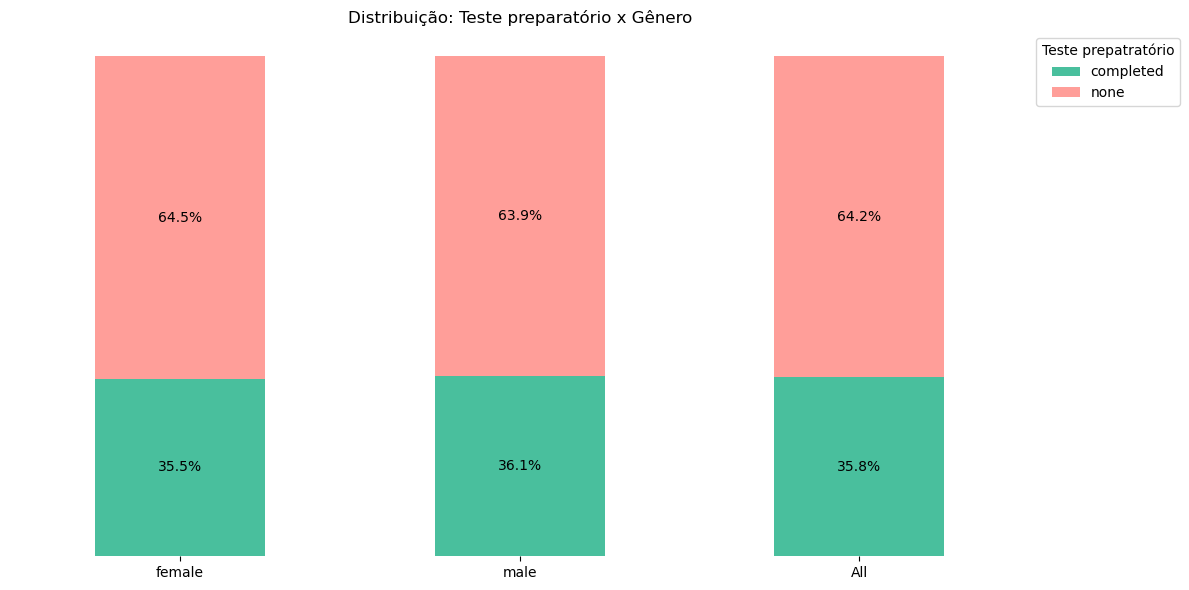

In [20]:
crosstab = pd.crosstab(df['gender'], df['test_preparation_course'], normalize='index', margins=True)*100

fig, ax = plt.subplots(figsize=(12, 6))

crosstab.plot(kind='bar', stacked=True, ax=ax, color=['#49BF9D', '#FF9E99'])

# Adicionar labels
for c in ax.containers:
    labels=[str(round(v.get_height(), 1)) + '%' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, label_type='center', labels=labels, size=10)

# Remover spines
for s in ['top', 'bottom', 'right', 'left']:
    ax.spines[s].set_visible(False)

plt.title('Distribuição: Teste preparatório x Gênero')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=0)
plt.yticks([])
plt.legend(title='Teste prepatratório', bbox_to_anchor=(1, 1))
plt.tight_layout();

A distribuição de realização do teste preparatório é semelhante entre os gêneros, sendo o percentual de homens que realizaram ligeiramente maior que o de mulheres.

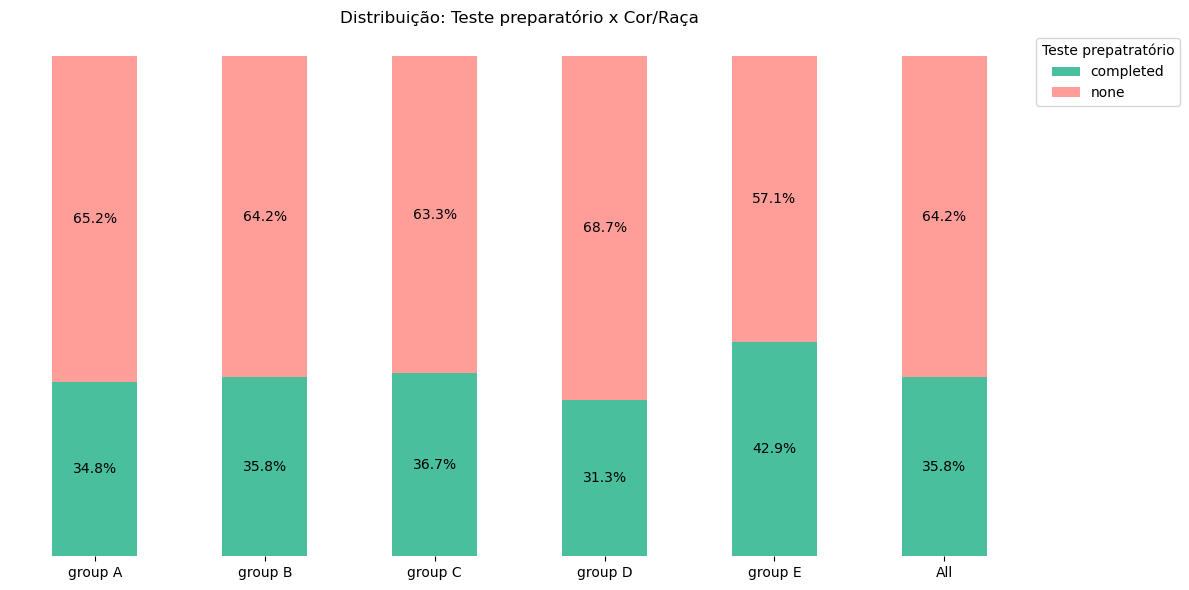

In [21]:
crosstab = pd.crosstab(df['race/ethnicity'], df['test_preparation_course'], normalize='index', margins=True)*100

fig, ax = plt.subplots(figsize=(12, 6))

crosstab.plot(kind='bar', stacked=True, ax=ax, color=['#49BF9D', '#FF9E99'])

# Adicionar labels
for c in ax.containers:
    labels=[str(round(v.get_height(), 1)) + '%' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, label_type='center', labels=labels, size=10)

# Remover spines
for s in ['top', 'bottom', 'right', 'left']:
    ax.spines[s].set_visible(False)

plt.title('Distribuição: Teste preparatório x Cor/Raça')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=0)
plt.yticks([])
plt.legend(title='Teste prepatratório', bbox_to_anchor=(1, 1))
plt.tight_layout();

A distribuição de realização do teste preparatório é semelhante entre os grupos A, B e C. O grupo D apresenta percentual de realização um pouco menor que o dos outros grupos, enquanto o grupo E apresenta percentual de realização um pouco maior que dos outros grupos.

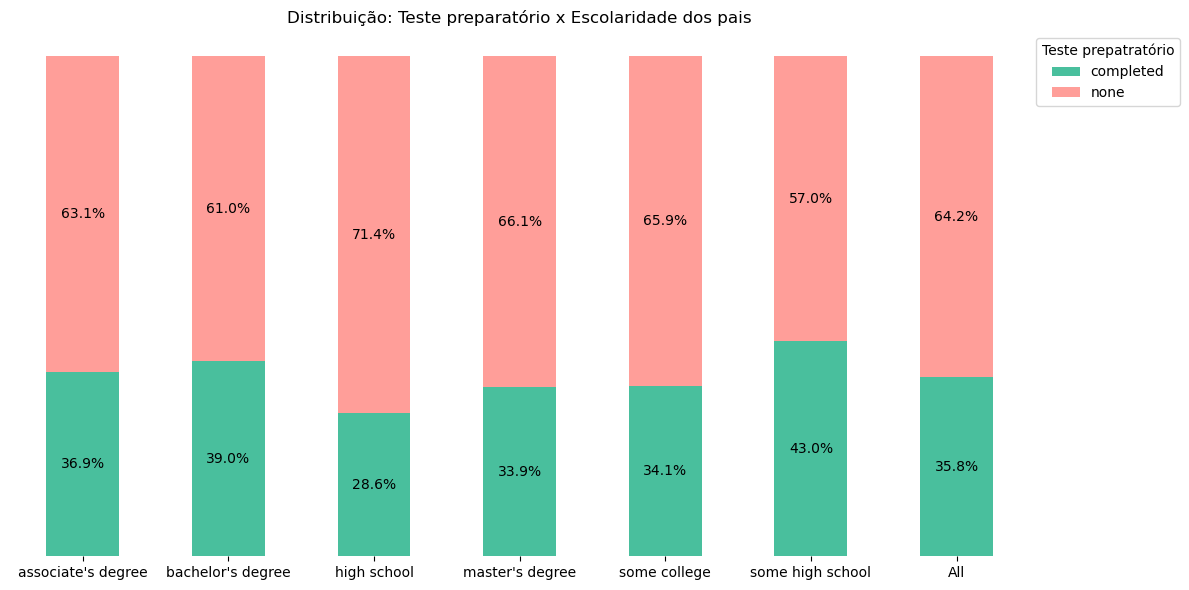

In [22]:
crosstab = pd.crosstab(df['parental_level_of_education'], df['test_preparation_course'], normalize='index', margins=True)*100

fig, ax = plt.subplots(figsize=(12, 6))

crosstab.plot(kind='bar', stacked=True, ax=ax, color=['#49BF9D', '#FF9E99'])

# Adicionar labels
for c in ax.containers:
    labels=[str(round(v.get_height(), 1)) + '%' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, label_type='center', labels=labels, size=10)

# Remover spines
for s in ['top', 'bottom', 'right', 'left']:
    ax.spines[s].set_visible(False)

plt.title('Distribuição: Teste preparatório x Escolaridade dos pais')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=0)
plt.yticks([])
plt.legend(title='Teste prepatratório', bbox_to_anchor=(1, 1))
plt.tight_layout();

As distribuiçãoes de realização do teste são mais próximas para as escolaridades 'associate's degree', 'master's degree' e 'some college' (entre ~33,9% e ~36.9%). Os percentuais de realização são mais altos para as escolaridades 'bachelor's degree' e 'some high school' (~39% e ~43%, respectivamente), enquanto para a escolaridade 'high school', o percentual de realização é menor (~28,6%).

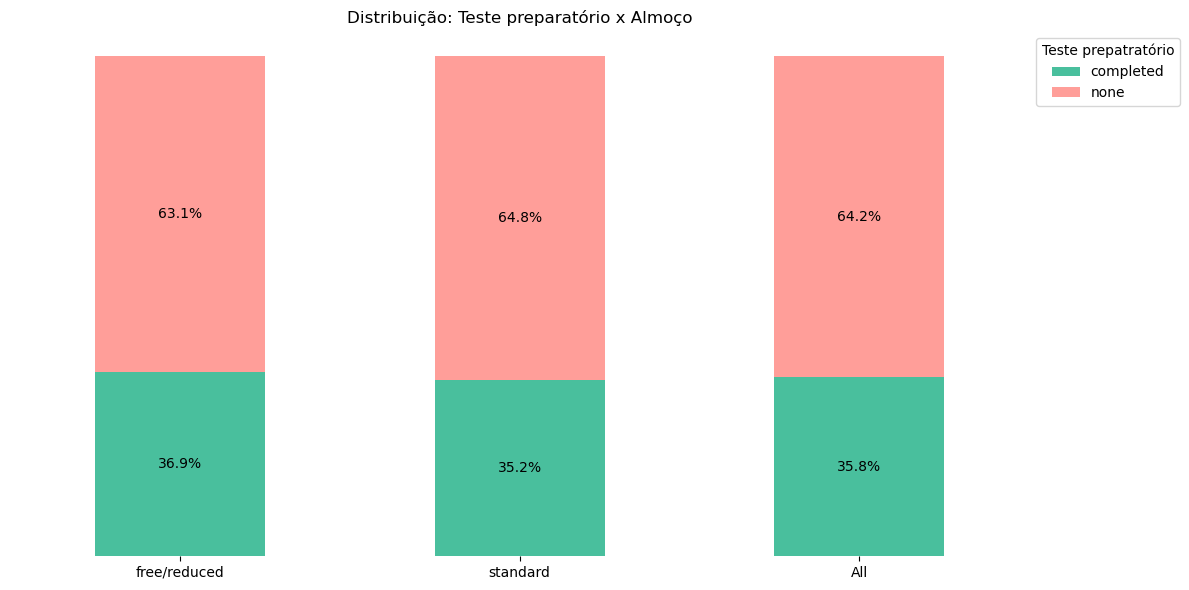

In [23]:
crosstab = pd.crosstab(df['lunch'], df['test_preparation_course'], normalize='index', margins=True)*100

fig, ax = plt.subplots(figsize=(12, 6))

crosstab.plot(kind='bar', stacked=True, ax=ax, color=['#49BF9D', '#FF9E99'])

# Adicionar labels
for c in ax.containers:
    labels=[str(round(v.get_height(), 1)) + '%' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, label_type='center', labels=labels, size=10)

# Remover spines
for s in ['top', 'bottom', 'right', 'left']:
    ax.spines[s].set_visible(False)

plt.title('Distribuição: Teste preparatório x Almoço')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=0)
plt.yticks([])
plt.legend(title='Teste prepatratório', bbox_to_anchor=(1, 1))
plt.tight_layout();

As distribuições são próximas, havendo um percentual ligeiramente superior de realizações do curso preparatório dentre os alunos que almoçam na modalidade 'free/reduced'.

In [24]:
df.loc[:, ['test_preparation_course', 'math_score', 'reading_score', 'writing_score']].groupby('test_preparation_course', as_index=False).describe().transpose()

0          1
test_preparation_course        completed       none
math_score              count      358.0      642.0
                        mean   69.695531  64.077882
                        std    14.444699  15.192376
                        min         23.0        0.0
                        25%         60.0       54.0
                        50%         69.0       64.0
                        75%         79.0      74.75
                        max        100.0      100.0
reading_score           count      358.0      642.0
                        mean   73.893855  66.534268
                        std    13.638384  14.463885
                        min         37.0       17.0
                        25%         65.0       57.0
                        50%         75.0       67.0
                        75%         84.0       76.0
                        max        100.0      100.0
writing_score           count      358.0      642.0
                        mean   74.418994  64.504673
                        std    13.375335  14.999661
                        min         36.0       10.0
                        25%         66.0       54.0
                        50%         76.0       65.0
                        75%         83.0       74.0
                        max        100.0      100.0

Na amostra, as notas médias do grupo que realizou o teste preparatório são maiores. Queremos saber se isso é verdade também para a população.

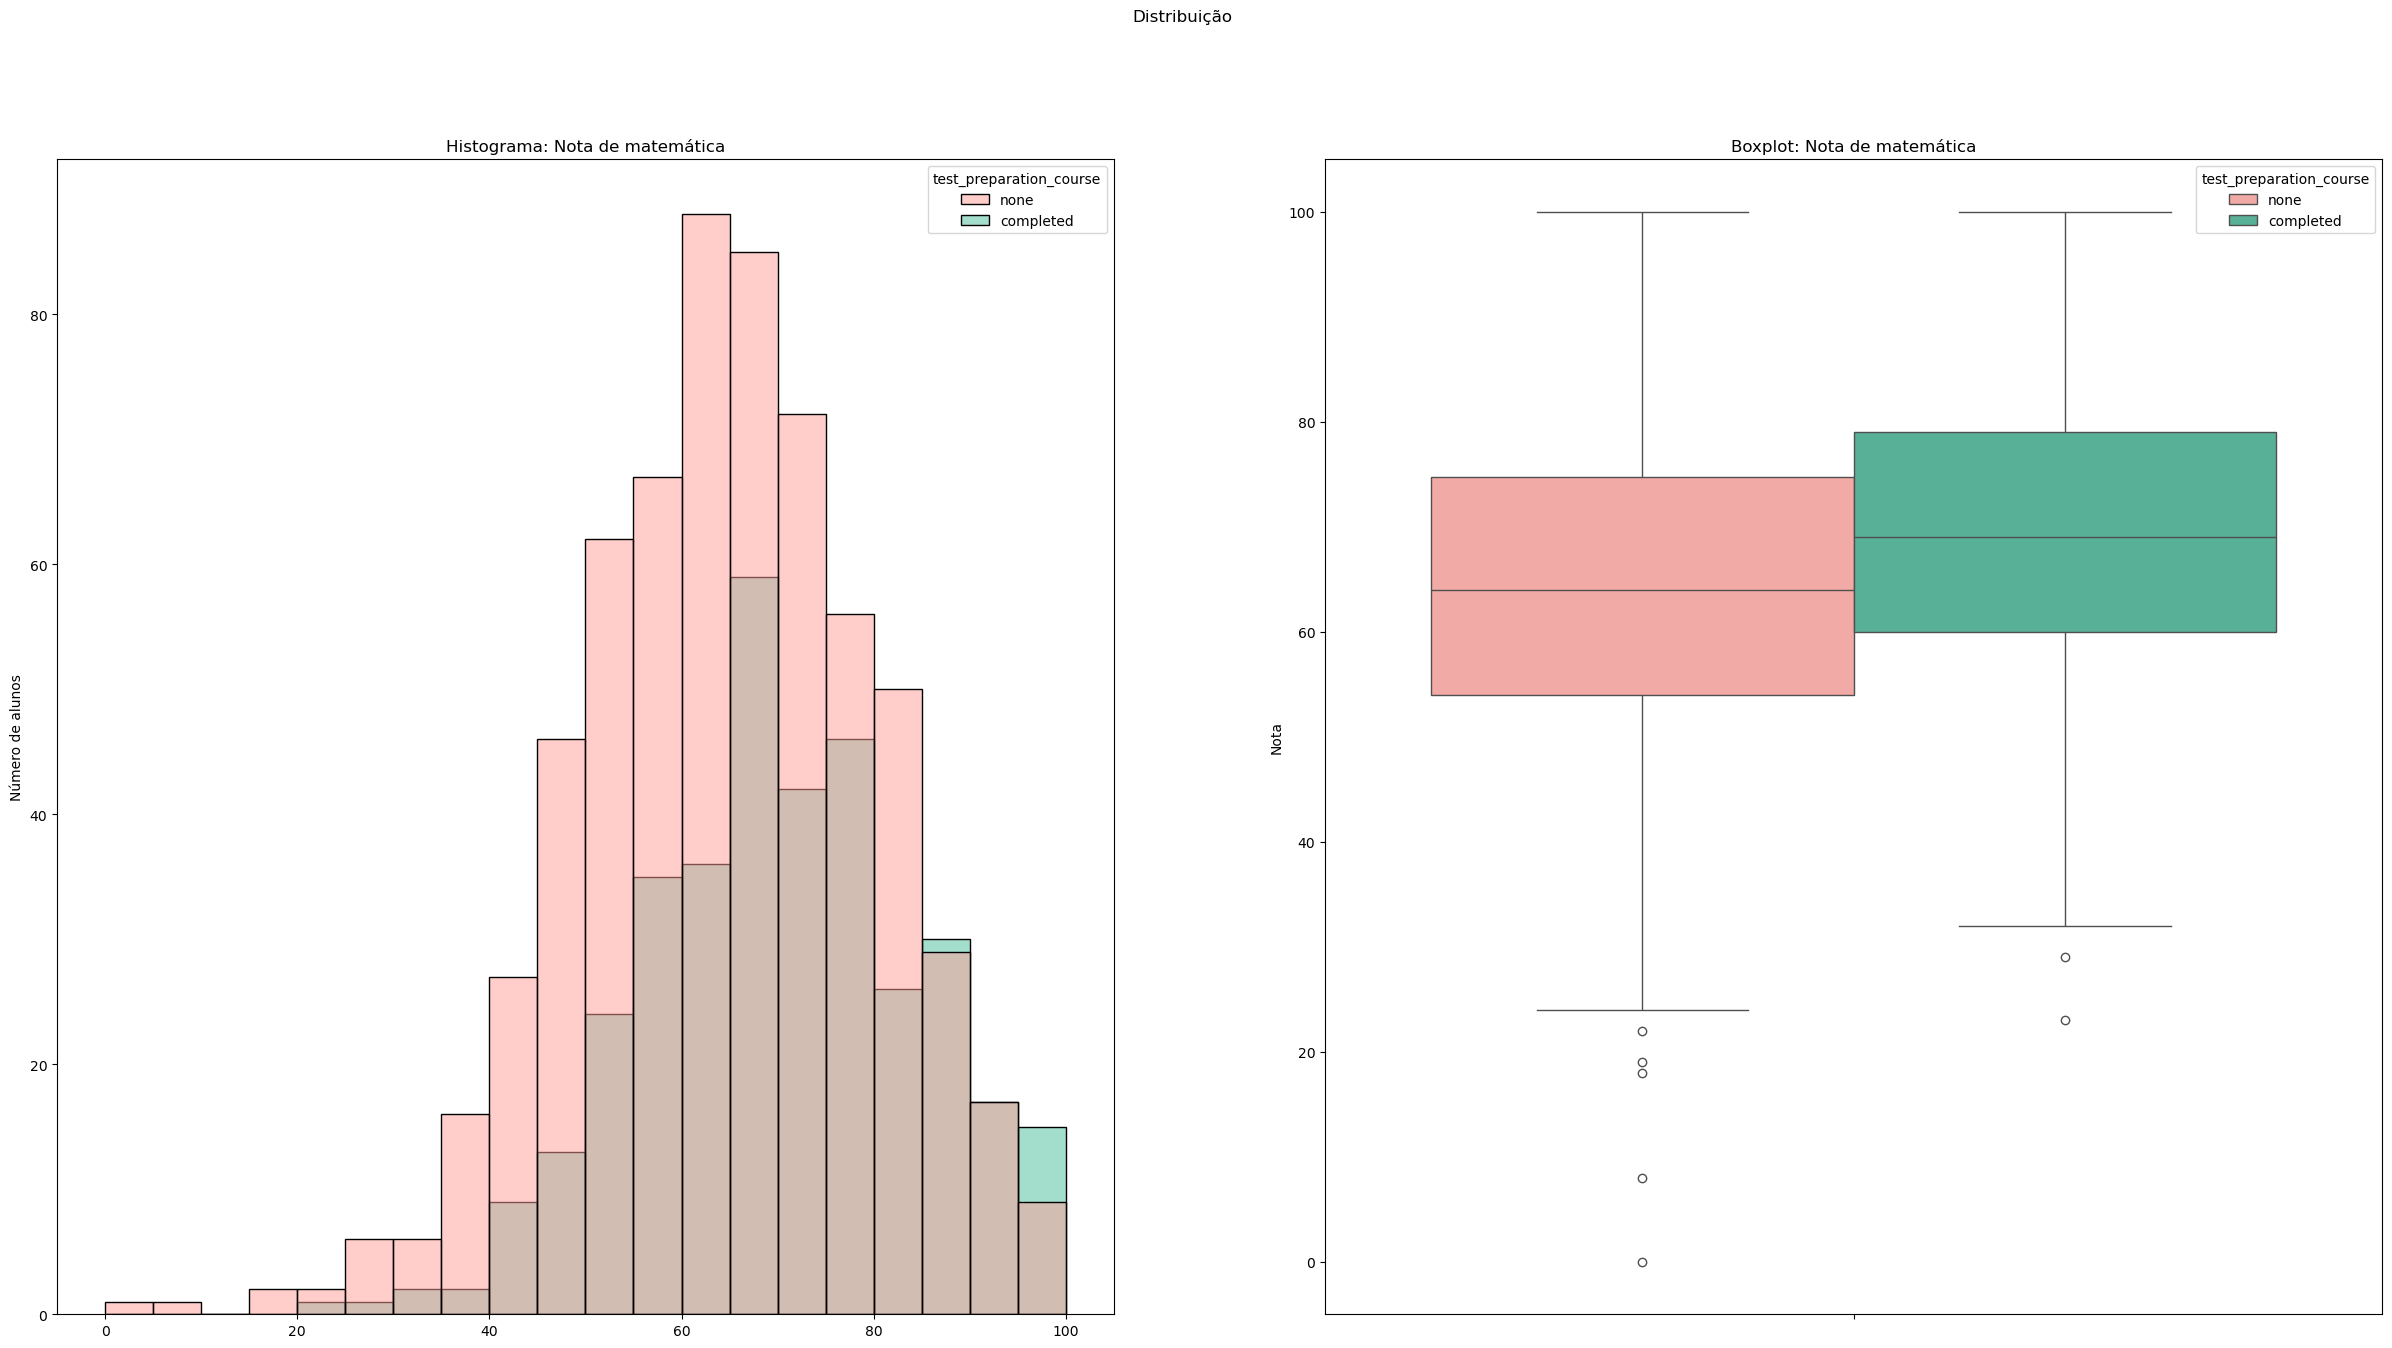

In [25]:
# Nota de matemática
fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Distribuição')

# Histograma
sns.histplot(ax=axes[0], data=df, x='math_score', hue='test_preparation_course', bins=20, palette=['#FF9E99', '#49BF9D'])
axes[0].set_title('Histograma: Nota de matemática')
axes[0].set_xlabel('') 
axes[0].set_ylabel('Número de alunos')

# Boxplot
sns.boxplot(data=df, y='math_score', hue='test_preparation_course', palette=['#FF9E99', '#49BF9D'])
axes[1].set_title('Boxplot: Nota de matemática')
axes[1].set_xlabel('') 
axes[1].set_ylabel('Nota');

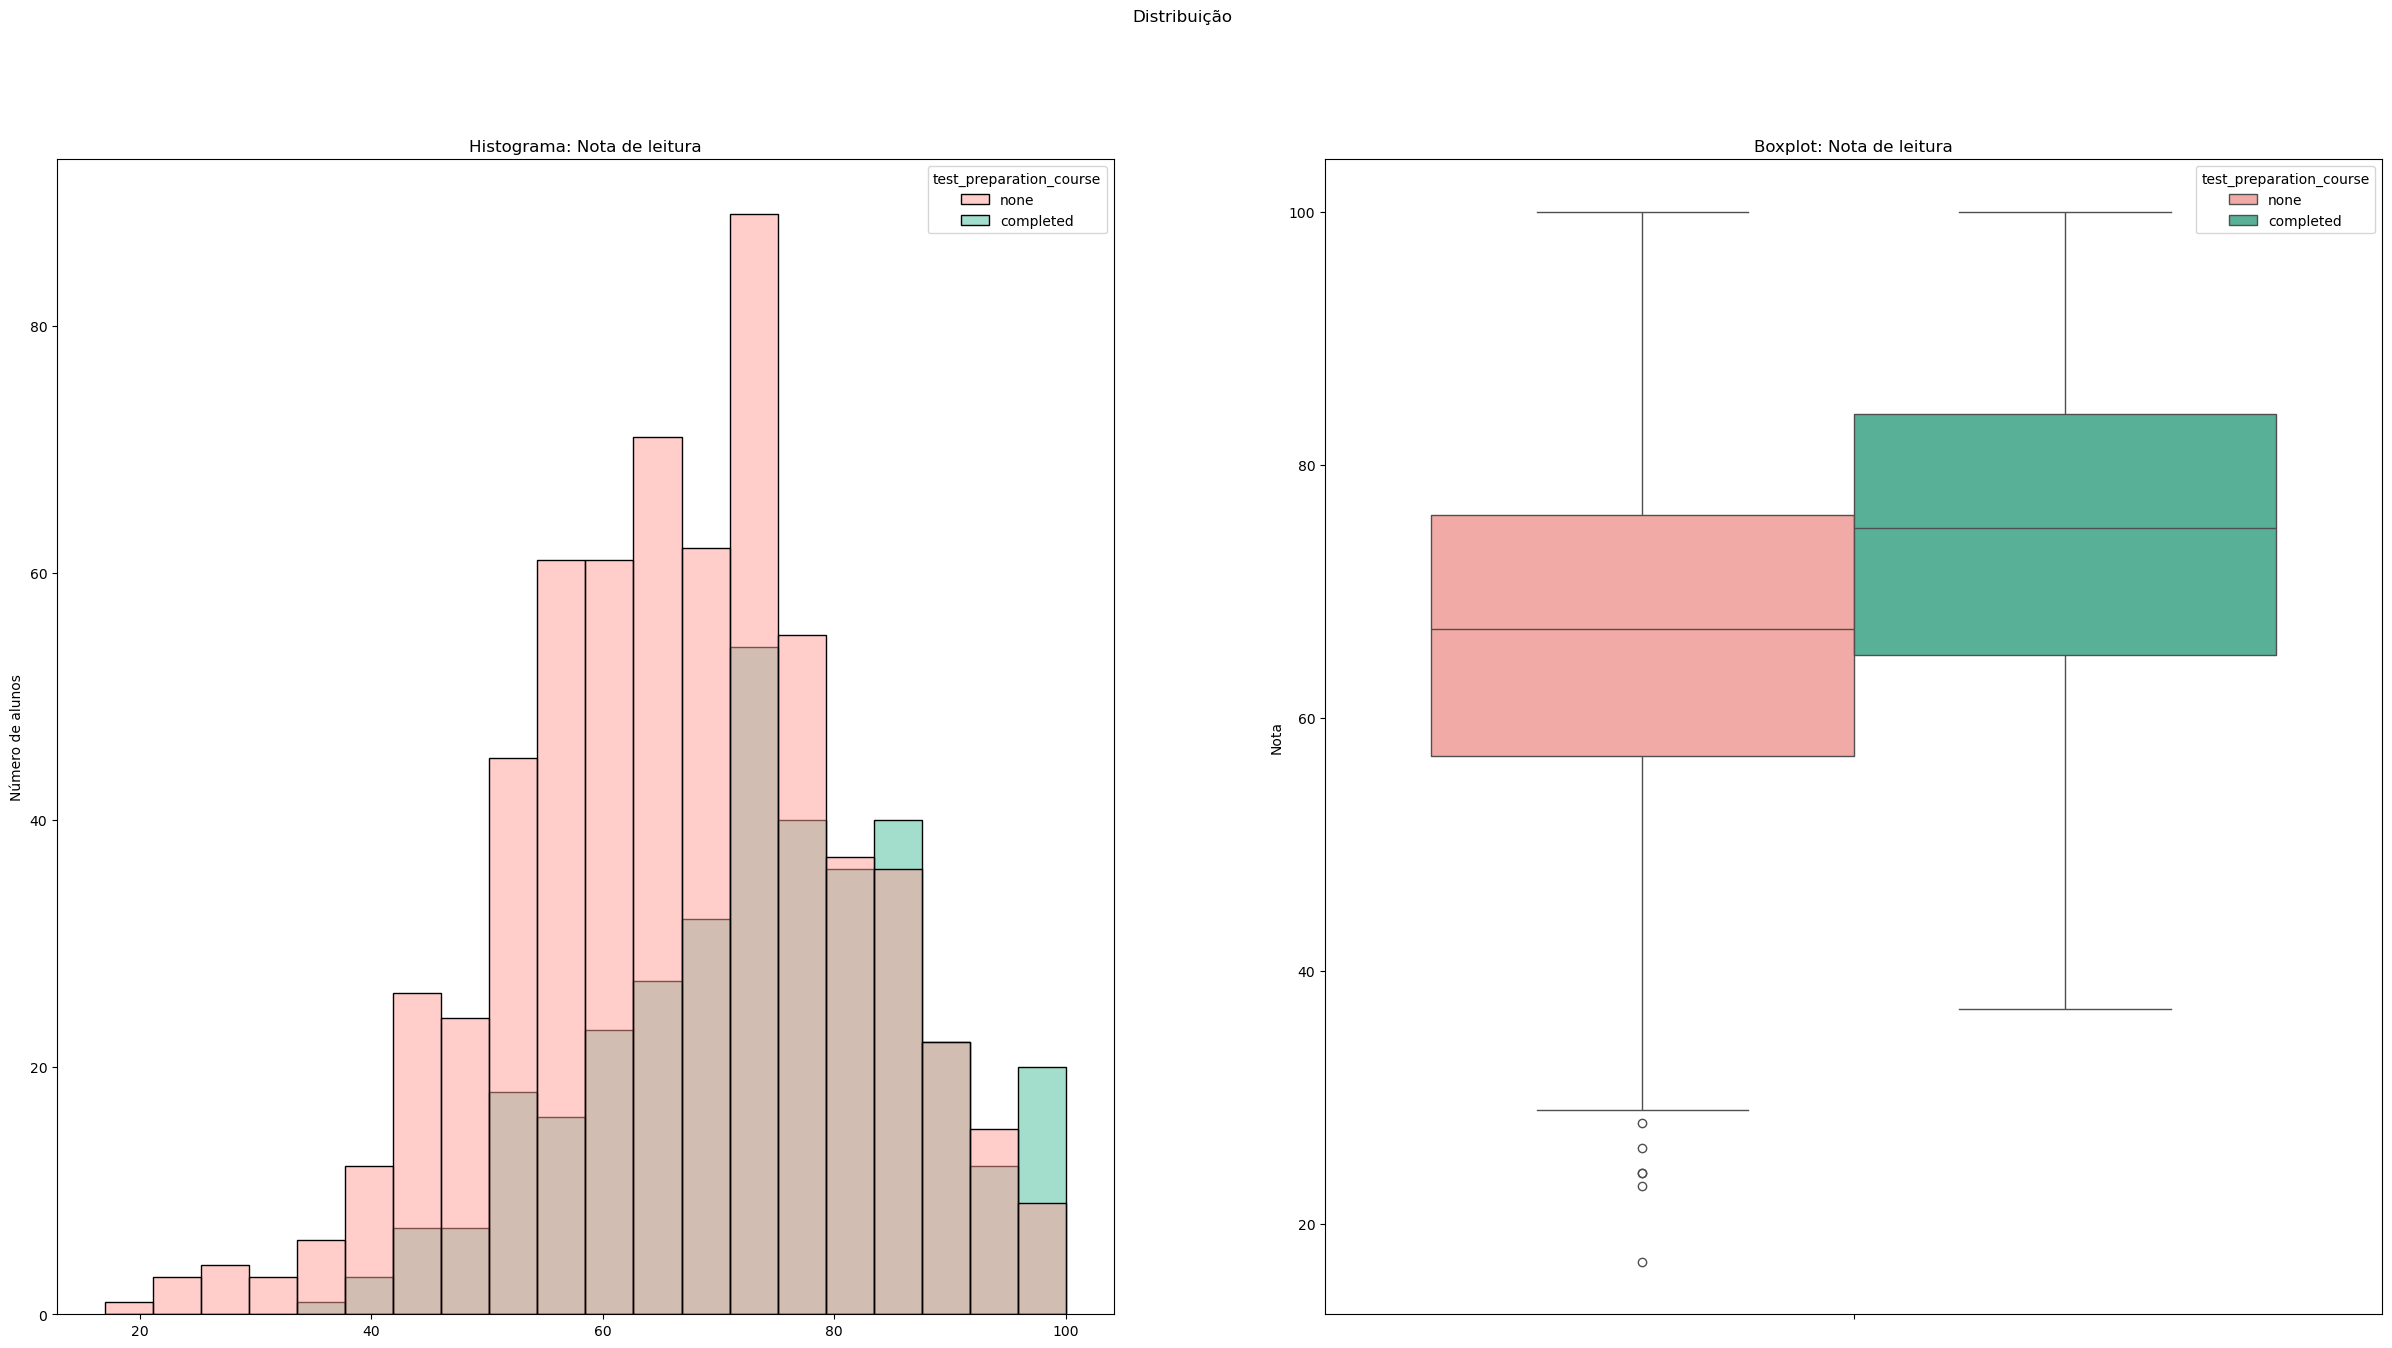

In [26]:
# Nota de leitura
fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Distribuição')

# Histograma
sns.histplot(ax=axes[0], data=df, x='reading_score', hue='test_preparation_course', bins=20, palette=['#FF9E99', '#49BF9D'])
axes[0].set_title('Histograma: Nota de leitura')
axes[0].set_xlabel('') 
axes[0].set_ylabel('Número de alunos')

# Boxplot
sns.boxplot(data=df, y='reading_score', hue='test_preparation_course', palette=['#FF9E99', '#49BF9D'])
axes[1].set_title('Boxplot: Nota de leitura')
axes[1].set_xlabel('') 
axes[1].set_ylabel('Nota');

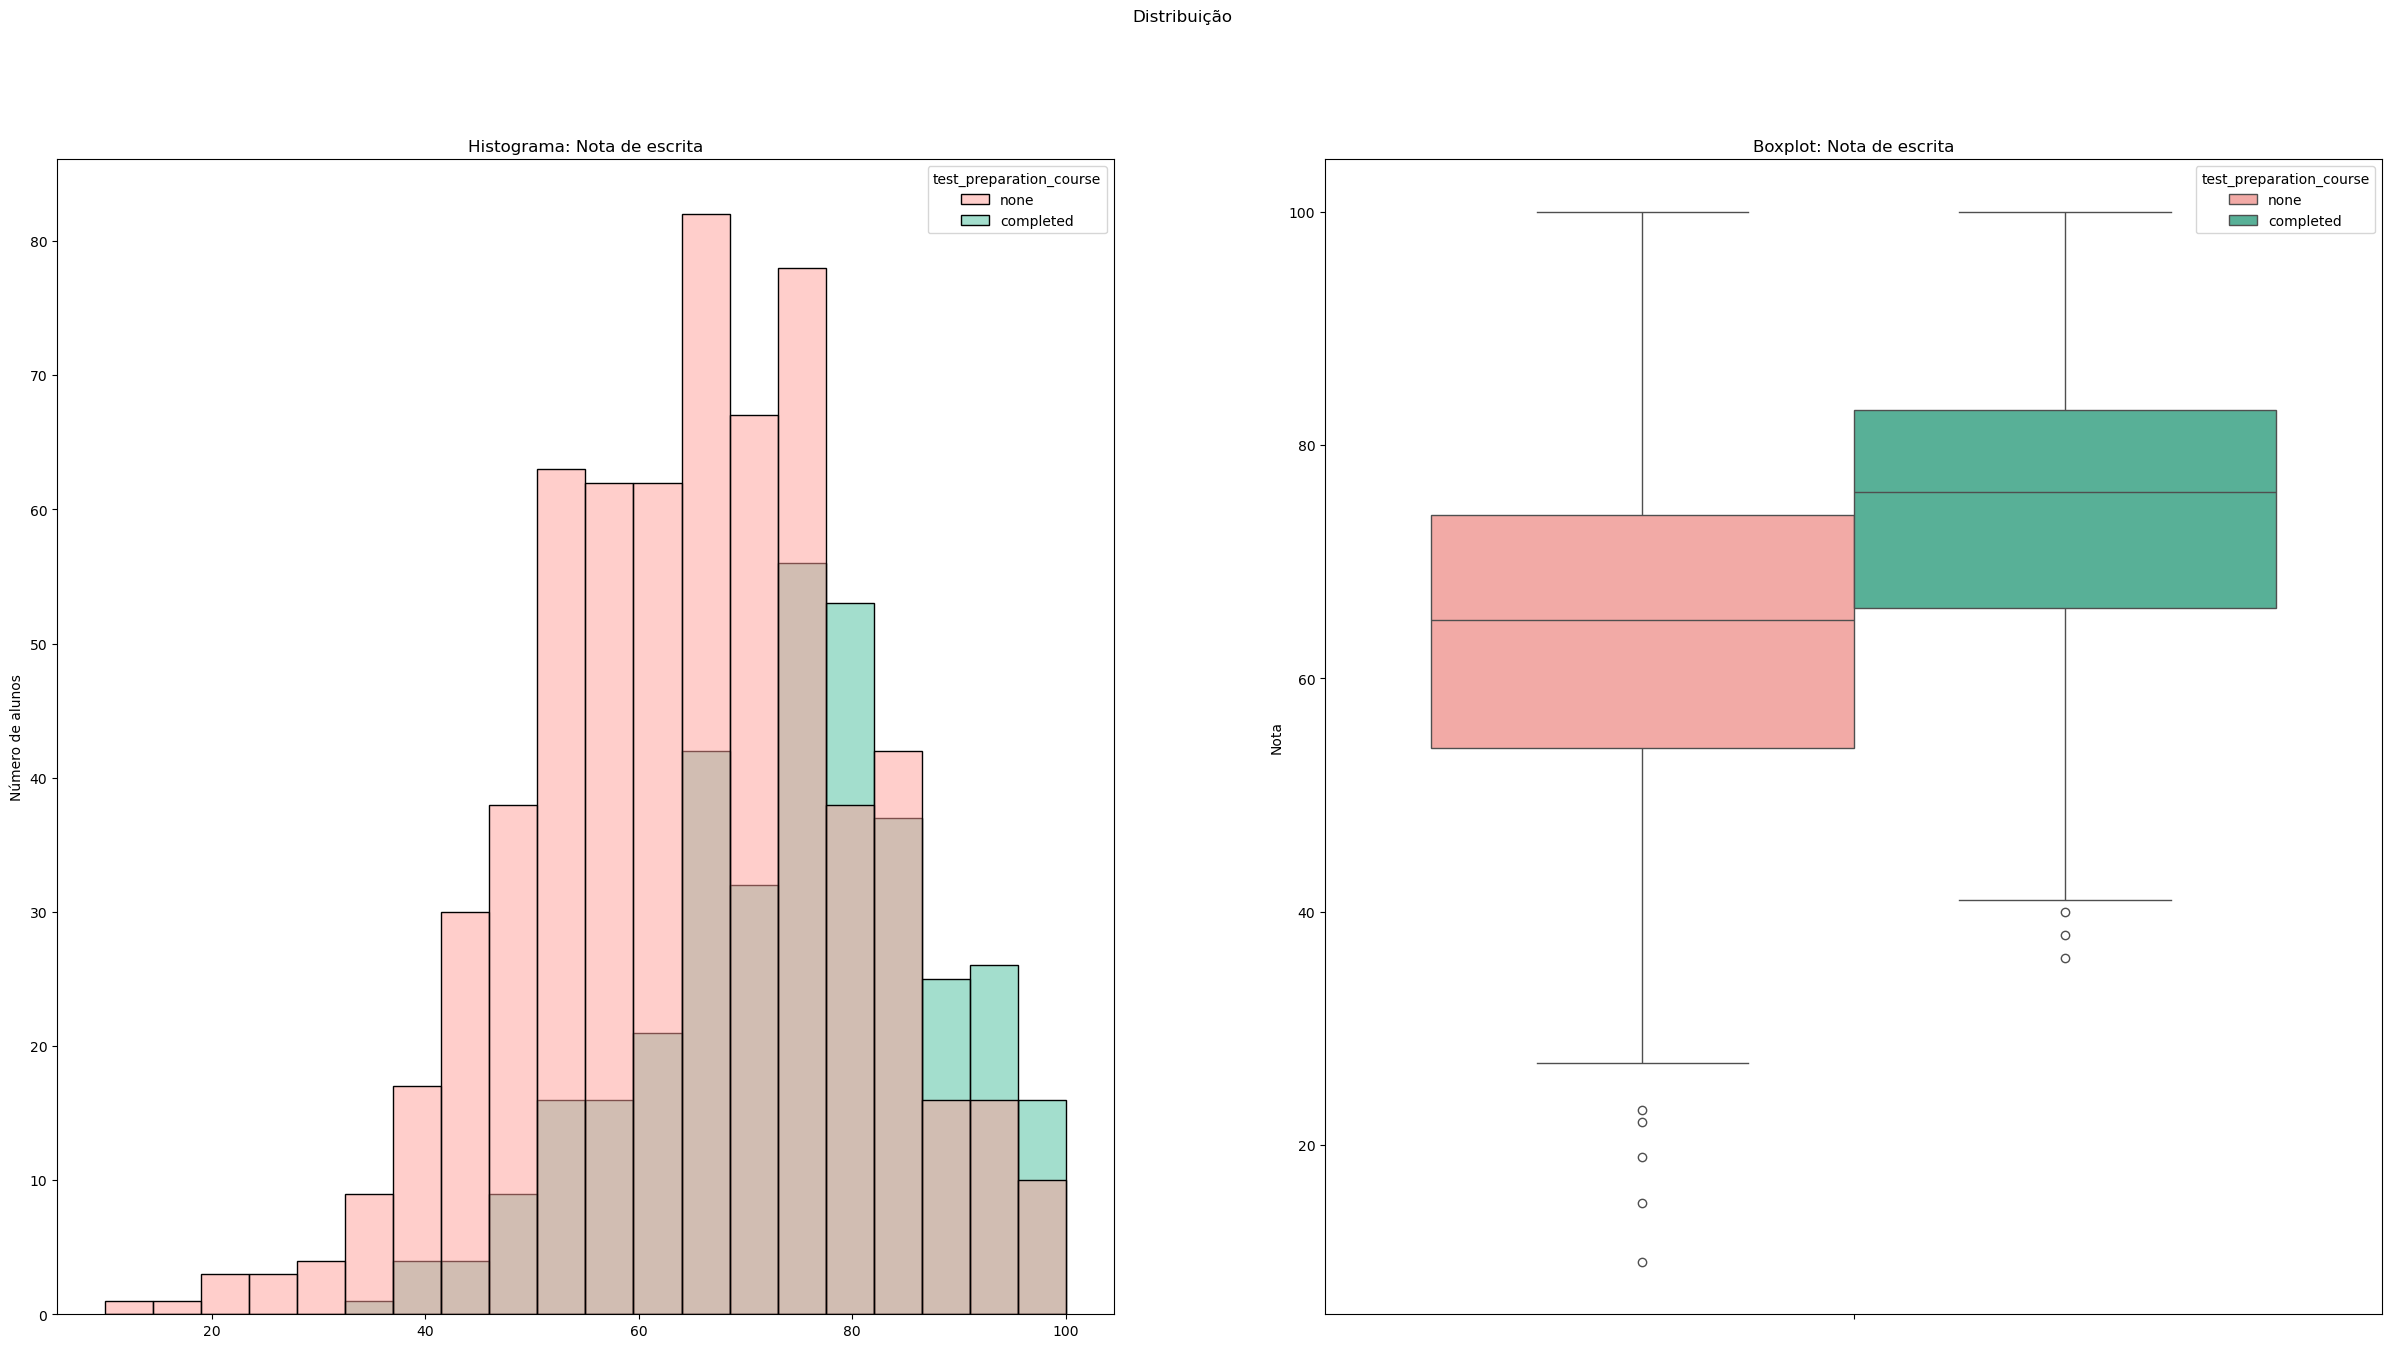

In [27]:
# Nota de escrita
fig, axes = plt.subplots(1, 2, figsize=(30, 15))
fig.suptitle('Distribuição')

# Histograma
sns.histplot(ax=axes[0], data=df, x='writing_score', hue='test_preparation_course', bins=20, palette=['#FF9E99', '#49BF9D'])
axes[0].set_title('Histograma: Nota de escrita')
axes[0].set_xlabel('') 
axes[0].set_ylabel('Número de alunos')

# Boxplot
sns.boxplot(data=df, y='writing_score', hue='test_preparation_course', palette=['#FF9E99', '#49BF9D'])
axes[1].set_title('Boxplot: Nota de escrita')
axes[1].set_xlabel('') 
axes[1].set_ylabel('Nota');

De maneira geral, na amostra, a mediana das notas dos alunos que fizeram o curso preparatório é maior. Além disso, os histogramas indicam que há maior frequência de alunos com as maiores notas que completaram o curso preparatório e há maior frequência de alunos que não fizeram o curso com as menores notas.

### Observações sobre possível viés de seleção

> Selection bias is the bias introduced by the selection of individuals, groups, or data for analysis in such a way that the association between exposure and outcome among those selected for analysis differs from the association among those eligible. It is sometimes referred to as the selection effect.

O viés de seleção pode se dar pelos seguintes fatores:

- A distribuição de alunos que realizaram o curso e que não realizaram de acordo com as características de raça, escolaridade dos pais e tipo de almoço não refletem as proporções desses grupos no total de alunos. Isso indica que a participação no curso não foi igualmente distribuída entre os diferentes grupos, ou seja, a amostra de alunos que fizeram o curso não é representativa do total em relação à raça, escolaridade e tipo de almoço.

- Outras características podem influenciar na aprovação além da realização do curso. Alunos que optam por fazer o curso podem ter características que favorecem melhor desempenho, como maior motivação e apoio familiar.

Destaca-se que a diferença entre o percentual de alunos que fizeram o curso preparatório e os que não fizeram não configura, por si só, um viés de seleção, pois a quantidade de alunos que realizou ou não o teste pode ser apenas uma consequência da realidade (menos alunos tiveram acesso ou optaram por realizar o curso).

## Teste de hipóteses - Médias de notas do curso de matemática

A média das notas de matemática dos alunos que fizeram o curso preparatório é maior do que daqueles que não fizeram?

### Escolha do nível de significância

Considerou-se o nível de significância alpha = 0.05

### Definição das hipóteses

m1 -> média das notas de matemática dos alunos que fizeram o curso preparatório

m2 -> média das notas de matemática dos alunos que não 
fizeram o curso preparatório

Hipóteses:

- Hipótese nula: As médias das notas de matemática dos alunos que fizeram o curso preparatório são iguais ou menores que as dos alunos que não fizeram (m1 - m2 <= 0)

- Hipótese alternativa: As médias das notas de matemática dos alunos que fizeram o curso preparatório são maiores que as dos alunos que não fizeram (m1 - m2 > 0)

### Preparação dos dados

In [28]:
# Creating columns
completed = df[df['test_preparation_course']=='completed']['math_score']
none = df[df['test_preparation_course']=='none']['math_score']

### Verificação de pressupostos

In [29]:
# Verifying sample size
print(f'N do grupo que fez o curso: {completed.count()}\nN do grupo que não fez o curso {none.count()}')

N do grupo que fez o curso: 358
N do grupo que não fez o curso 642


O tamanho de amostra é > 30. Podemos assumir a normalidade da distribuição das médias das amostras pelo Teorema do Limite Central.

Precisamos verificar se as variâncias são iguais ou não. Para isso, vamos usar o teste F, que pressupõe amostras independentes e com distribuição normal ou pelo menos 20 observações.

H0: var1 = var2

H1: var1 =/ var2

alpha = 0,05

In [30]:
# Verifying variances
print(completed.var())
print(none.var()) # Numerador

208.6493357119386
230.8082775647473


In [31]:
gl1 = len(none) - 1
gl2 = len(completed) -1
F_statistic = none.var()/completed.var()
p_value = 2*(1 - st.f.cdf(F_statistic, gl1, gl2))
p_value

np.float64(0.2864487684241128)

Como p-valor > alpha, não há evidências estatísticas para rejeitar a hipótese nula de que as variâncias são iguais.

### Escolha do teste

Teste de hipóteses para média de 2 amostras com desvio padrão populacional desconhecido e amostras independentes -> Teste t

### Aplicando teste

In [32]:
t, pvalue = st.ttest_ind(
                            a=completed, 
                            b=none, 
                            equal_var=True, # Variâncias são iguais
                            alternative='greater'
                              
                        )

print(f'A estatística de teste é: {t:.2f}.\nO p-valor é: {pvalue}')

A estatística de teste é: 5.70.
O p-valor é: 7.679567303573707e-09


Como p-valor < alpha, rejeita-se a hipótese nula, ou seja, há evidências estatísticas de que as médias populacionais são diferentes.

### Cálculo do intervalo de confiança para a diferença de médias

In [33]:
# Degrees of freedom
gl = len(completed) + len(none) - 2

# Critical t value (https://www.omnicalculator.com/statistics/critical-value) - Tabelado
tc = 1.9623

# Considering equal variances
s = ((((len(completed) - 1)*completed.var() + (len(none) - 1)*none.var())/gl)**(1/2))*(1/len(completed) + 1/len(none))**(1/2)

lower_limit = completed.mean() - none.mean() - (tc*s)
upper_limit = completed.mean() - none.mean() + (tc*s)

print(f'Limite inferior: {lower_limit} e limite superior: {upper_limit}')

Limite inferior: 3.6852645190216755 e limite superior: 7.550033693616907


In [34]:
print(f'A diferença entre as médias das notas está no intervalo de {lower_limit:.2f} a {upper_limit:.2f}.')

A diferença entre as médias das notas está no intervalo de 3.69 a 7.55.


O intervalo de confiança deve concordar com o teste de hipóteses. O intervalo não passa por zero, logo as médias são diferentes, conforme comprovamos no teste de hipóteses.

### Interpretação dos resultados

O resultado do teste de hipóteses permite rejeitar a hipótese nula com base no p-valor < alpha. Ou seja, há evidências estatísticas de que, para a população, a média de notas de matemática dos alunos que realizaram o curso preparatório é maior que a dos alunos que não realizaram.

Considerando-se o intervalo de confiança para o tamanho do efeito (3,69 < diferença entre médias populacionais < 7.55), ou seja, que a diferença entre as médias populacionais, a 95% de confiança, está entre 3,69 e 7,55, o ganho mínimo considerado pelo negócio (aumento de pelo menos 5 pontos na média de notas de matemática) poderia não ser atingido com a expansão do curso preparatório.

Assim, antes de tomar uma decisão sobre a expansão do curso, precisamos verificar também a proporção de aprovados e estimar financeiramente o custo benefício da expansão do curso preparatório.

## Teste de hipóteses - Proporção de aprovações em matemática

A proporção de alunos aprovados em matemática (nota ≥ 60) é maior entre os que fizeram o curso preparatório?

### Escolha do nível de significância

Considerou-se o nível de significância alpha = 0.05

### Definição das hipóteses

p1 -> proporção de alunos aprovados em matemática que fizeram o curso preparatório

p2 -> proporção de alunos aprovados em matemática que não fizeram o curso preparatório

Hipóteses:

- Hipótese nula: As proporções de aprovação em matemática dos alunos que fizeram o curso preparatório são iguais ou menores que as dos alunos que não fizeram (p1 - p2 <= 0)

- Hipótese alternativa: As proporções de aprovação em matemática dos alunos que fizeram o curso preparatório são maiores que as dos alunos que não fizeram (p1 - p2 > 0)

### Preparação dos dados

In [35]:
# Creating columns
df['aprovacao'] = np.where(df['math_score'] >= 60, 1, 0)

completed_proportion = df[df['test_preparation_course'] == 'completed']['aprovacao']
none_proportion = df[df['test_preparation_course'] == 'none']['aprovacao']

print(completed_proportion.mean(), none_proportion.mean())

0.7569832402234636 0.632398753894081


Na amostra, a proporção de alunos aprovados é maior para o grupo que realizou o curso preparatório. Vamos realizar o teste de hipótese para verificar se essa diferença também se estende à população.

### Verificação de pressupostos

In [36]:
print(completed_proportion.count()*completed_proportion.mean() >= 5)
print(completed_proportion.count()*(1- completed_proportion.mean()) >= 5)
print(none_proportion.count()*none_proportion.mean() >= 5)
print(none_proportion.count()*(1- none_proportion.mean()) >= 5)

True
True
True
True


### Escolha do teste

Teste de hipóteses para proporção de 2 amostras independentes -> Teste Z

### Aplicando teste

In [37]:
# Número de sucessos
successes = [completed_proportion.sum(), none_proportion.sum()]

# Tamanho da amostra
nobs = [completed_proportion.count(), none_proportion.count()]

# Teste
z, pvalue = proportion.proportions_ztest(successes, nobs=nobs, alternative='larger')

print(f'A estatística de teste é: {z:.2f}.\nO p-valor é: {pvalue}')

A estatística de teste é: 4.04.
O p-valor é: 2.6836011193638547e-05


### Cálculo do intervalo de confiança

In [38]:
(completed_proportion.mean() - none_proportion.mean())*100

np.float64(12.458448632938268)

In [39]:
z_critico = 1.96 # Para 95% de confiança
p1 = completed_proportion.mean()
n1 = completed_proportion.count()
p2 = none_proportion.mean()
n2 = none_proportion.count()
dif = completed_proportion.mean() - none_proportion.mean()

limit = z_critico*(((p1*(1-p1)/n1) + (p2*(1-p2)/n2))**(1/2))

print(f'A diferença entre as proporções de aprovações está no intervalo de {(dif - limit)*100:.1f} a {(dif+limit)*100:.1f}.')

A diferença entre as proporções de aprovações está no intervalo de 6.7 a 18.3.


### Interpretação dos resultados

O resultado do teste de hipóteses permite rejeitar a hipótese nula com base no p-valor < alpha. Ou seja, há evidências estatísticas de que, para a população, a proporção de aprovados em matemática dos alunos que realizaram o curso preparatório é maior que a dos alunos que não realizaram.

Considerando-se o intervalo de confiança para o tamanho do efeito (6,7 < diferença entre proporções de aprovação < 18,3), ou seja, que a diferença entre as proporções populacionais, a 95% de confiança, está entre 6,7 e 18,3, o ganho mínimo considerado pelo negócio (aumento de pelo menos 10 pontos percentuais nas aprovações em matemática) poderia não ser atingido com a expansão do curso preparatório.

Assim, cabe ao negócio decidir se um aumento em pontos percentuais mais próximo ao limite inferior ainda justificaria a expansão do curso preparatório considerando os ganhos financeiros.

## Estimativa de custo-benefício da expansão do curso preparatório

#### Cenário pessimista

A estimativa de cuso-benefício da expansão do curso preparatório leva em conta um aumento no percentual de aprovações em matemática de 6,7 pontos percentuais (limite inferior do intervalo de confiança para a diferença de proporções).

In [53]:
# Considerando os mil alunos atuais do curso

# Percentual de aprovação em matemática sem o curso preparatório:
print(f'Percentual de aprovação sem curso preparatório: {none_proportion.mean()*100:.2f}.')

# O percentual de aprovação com o curso preparatório poderia ter sido (considerando o limite inferior do intervalo de confiança):
print(f'Percentual de aprovação com o curso preparatório: {none_proportion.mean()*100 + (dif - limit)*100:.2f}.')

# Custos da expansão do curso - 50 reais por aluno:
print(f'A expansão do curso tem um custo de {1000*50} reais.')

# Receita vinda do curso preparatório:
print(f'O curso preparatório geraria uma receita de {100*1000} reais.')

# Alunos com desempenho melhor têm 10% mais probabilidade de se inscreverem em outro curso de 200 reais (Valor esperado de 20 reais):
print(f'Quantidade de alunos aprovados com implementação do curso preparatório: {(none_proportion.mean() + (dif - limit))*1000:.0f}.')
print(f'Considerando-se o valor esperado de 20 reais por aluno aprovado, espera-se uma receita de {20*699} reais com a inscrição dos aprovados em novas matérias.')

Percentual de aprovação sem curso preparatório: 63.24.
Percentual de aprovação com o curso preparatório: 69.90.
A expansão do curso tem um custo de 50000 reais.
O curso preparatório geraria uma receita de 100000 reais.
Quantidade de alunos aprovados com implementação do curso preparatório: 699.
Considerando-se o valor esperado de 20 reais por aluno aprovado, espera-se uma receita de 13980 reais com a inscrição dos aprovados em novas matérias.


#### Cenário otimista

A estimativa de cuso-benefício da expansão do curso preparatório leva em conta um aumento no percentual de aprovações em matemática de 18,3 pontos percentuais (limite superior do intervalo de confiança para a diferença de proporções).

In [54]:
# Considerando os mil alunos atuais do curso

# Percentual de aprovação em matemática sem o curso preparatório:
print(f'Percentual de aprovação sem curso preparatório: {none_proportion.mean()*100:.2f}.')

# O percentual de aprovação com o curso preparatório poderia ter sido (considerando o limite superior do intervalo de confiança):
print(f'Percentual de aprovação com o curso preparatório: {none_proportion.mean()*100 + (dif + limit)*100:.2f}.')

# Custos da expansão do curso - 50 reais por aluno:
print(f'A expansão do curso tem um custo de {1000*50} reais.')

# Receita vinda do curso preparatório:
print(f'O curso preparatório geraria uma receita de {100*1000} reais.')

# Alunos com desempenho melhor têm 10% mais probabilidade de se inscreverem em outro curso de 200 reais (Valor esperado de 20 reais):
print(f'Quantidade de alunos aprovados com implementação do curso preparatório: {(none_proportion.mean() + (dif + limit))*1000:.0f}.')
print(f'Considerando-se o valor esperado de 20 reais por aluno aprovado, espera-se uma receita de {20*815} reais com a inscrição dos aprovados em novas matérias.')

Percentual de aprovação sem curso preparatório: 63.24.
Percentual de aprovação com o curso preparatório: 81.50.
A expansão do curso tem um custo de 50000 reais.
O curso preparatório geraria uma receita de 100000 reais.
Quantidade de alunos aprovados com implementação do curso preparatório: 815.
Considerando-se o valor esperado de 20 reais por aluno aprovado, espera-se uma receita de 16300 reais com a inscrição dos aprovados em novas matérias.


#### Cenário considerando os 10 pontos percentuais de aumento almejados pelo negócio

A estimativa de cuso-benefício da expansão do curso preparatório leva em conta um aumento no percentual de aprovações em matemática de 10 pontos percentuais (ganho mínimo considerado pelo negócio).

In [55]:
# Considerando os mil alunos atuais do curso

# Percentual de aprovação em matemática sem o curso preparatório:
print(f'Percentual de aprovação sem curso preparatório: {none_proportion.mean()*100:.2f}.')

# O percentual de aprovação com o curso preparatório poderia ter sido (considerando o limite superior do intervalo de confiança):
print(f'Percentual de aprovação com o curso preparatório: {none_proportion.mean()*100 + 0.10*100:.2f}.')

# Custos da expansão do curso - 50 reais por aluno:
print(f'A expansão do curso tem um custo de {1000*50} reais.')

# Receita vinda do curso preparatório:
print(f'O curso preparatório geraria uma receita de {100*1000} reais.')

# Alunos com desempenho melhor têm 10% mais probabilidade de se inscreverem em outro curso de 200 reais (Valor esperado de 20 reais):
print(f'Quantidade de alunos aprovados com implementação do curso preparatório: {(none_proportion.mean() + 0.10)*1000:.0f}.')
print(f'Considerando-se o valor esperado de 20 reais por aluno aprovado, espera-se uma receita de {20*732} reais com a inscrição dos aprovados em novas matérias.')

Percentual de aprovação sem curso preparatório: 63.24.
Percentual de aprovação com o curso preparatório: 73.24.
A expansão do curso tem um custo de 50000 reais.
O curso preparatório geraria uma receita de 100000 reais.
Quantidade de alunos aprovados com implementação do curso preparatório: 732.
Considerando-se o valor esperado de 20 reais por aluno aprovado, espera-se uma receita de 14640 reais com a inscrição dos aprovados em novas matérias.


#### Analisando os cenários

In [66]:
# O lucro atual estimado da escola é:

# Custo das três disciplinas atuais
custo_atual = 50*1000*3

# Receita com as três disciplinhas atuais
receita_atual = 200*1000*3

# Lucro atual
print(f'Lucro atual da escola: {receita_atual - custo_atual}')

Lucro atual da escola: 450000


In [ ]:
# Lucro estimado com o curso preparatório
print(f'Cenário pessimista - Lucro de {100000 - 50000 + 13980 } reais com o curso preparatório.')
print(f'Cenário otimista - Lucro de {100000 - 50000 + 16300} reais com o curso preparatório.')
print(f'Cenário considerando o aumento de 10 pontos percentuais - Lucro de {100000 - 50000 + 14640} reais com o curso preparatório.')

Cenário pessimista - Lucro de 63980 reais com o curso preparatório.
Cenário otimista - Lucro de 66300 reais com o curso preparatório.
Cenário considerando o aumento de 10 pontos percentuais - Lucro de 64640 reais com o curso preparatório.


In [74]:
# Aumento no lucro:

# Cenário pessimista
print(f'O aumento do lucro no cenário pessimista é de: {100*((450000+63980) - 450000)/450000:.1f}%')

# Cenário otimista
print(f'O aumento do lucro no cenário otimista é de: {100*((450000+66300) - 450000)/450000:.1f}%')

# Cenária considerando o aumento de 10 pontos percentuais na aprovação
print(f'O aumento do lucro no cenário considerando o aumento de 10 pontos percentuais é de: {100*((450000+64640) - 450000)/450000:.1f}%')

O aumento do lucro no cenário pessimista é de: 14.2%
O aumento do lucro no cenário otimista é de: 14.7%
O aumento do lucro no cenário considerando o aumento de 10 pontos percentuais é de: 14.4%


Espera-se um aumento no lucro da escola considerando a expansão do curso preparatório entre 14,2% e 14,7%.
Mesmo considerando o cenário pessimista, o aumento no lucro ainda é significativo. Ainda, o aumento no lucro não é tão diferente considerando os três cenários testados. Logo, mesmo que o aumento no percentual de aprovação fique abaixo dos 10 pontos percentuais almejados pelo negócio, o aumento no lucro compensa a expansão do curso preparatório.

## Conclusão

Foi solicitada uma análise do impacto da implementação de um curso preparatório nas notas e aprovações da disciplina de matemática. Para tanto, analisou-se dados de aplicação do curso para uma amostra de estudantes da escola. O negócio considerava que um ganho mínimo seria uma aumento de pelo menos 5 pontos na média de notas e de pelo menos 10 pontos percentuais no percentual de aprovações em matemática.

Para verificação da diferença entre as médias de notas e percentual de aprovação dos alunos que realizaram e que não realizaram o curso, foram realizados testes de hipóteses. Os testes comprovaram estatísticamente, que a média de notas e percentual de aprovação são maiores para os alunos que realizaram o curso preparatório. No entando, o cálculo do intervalo de confiança para a média e percentual de aprovação demonstrou que o aumento pode estar abaixo do "ganho mínimo" almejado pelo negócio.

Apesar disso, a análise de viabilidade financeira demonstrou que, mesmo no cenário pessimista para o tamanho do aumento do percentual de aprovação, o lucro da escola com a implementação do curso ainda seria significativo (14,2%).

**Impacto do curso preparatório**:
- **Aumento** na média de notas de matemática entre 3,69 e 7,55 pontos.
- **Aumento** no percentual de aprovações em matemática entre 6,7 e 18,3 pontos percentuais.
- **Aumento** no lucro da escola entre 14,2% e 14,7%.

**Recomendações**:
- **Expandir o curso preparatório** para todos os alunos, considerando tanto a evidência de impacto positivo nas notas e aprovações, quanto o aumento no lucro da escola.
- **Monitorar continuamente** os resultados após a expansão, avaliando se os cenários estimados se mantêm.
- **Investigar** o custo benefício da expansão do curso preparatório também para as outras disciplinas da escola, como escrita e leitura.